# Contexto

Meu objetivo neste projeto é explorar alternativas de regressão linear e criar o melhor modelo possível para prever o desempenho de alunos com base em dados socioeconômicos do ENEM (Exame Nacional do Ensino Médio) 2021.

Para isso, utilizarei um conjunto de dados estratificado por estado, representando 10% do total de candidatos inscritos no ENEM. Os dados completos podem ser obtidos no Portal de Dados Abertos do INEP <a href="https://www.gov.br/inep/pt-br">(Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira)</a>. O conjunto de dados é baseado em duas fontes de informação: o <a href="https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem">questionário socioeconômico</a>, respondido pelos candidatos durante o processo de inscrição em 2021, e as notas obtidas pelos candidatos em cinco áreas do exame: redação, matemática, linguagens e códigos, ciências humanas e ciências da natureza.

A variável-alvo (ou target) deste proejto é a variável NU_MEDIA, que representa a média aritmética das cinco notas obtidas pelos candidatos no ENEM. Meu objetivo é desenvolver um modelo de regressão capaz de prever essa média com base nas informações socioeconômicas dos alunos.

# Entendimento dos dados

## Analise preliminar

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Enfrentei alguns problemas ao importar esta base de dados direto do GIT portanto estou realizando a leitura local desta base de dados.

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
df_enem = pd.read_csv('/content/drive/MyDrive/Base_de_dados_do_Enem (1).csv',  sep=',')

In [161]:
df_enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,A,D,4.0,F,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200500,Sena Madureira,12,AC,1,1,1,1,909.0,881.0,892.0,899.0,407.8,555.2,555.3,374.5,AEDADBADDEEDADCBBBEABAEDAECDEEECAAADECCDCBACE,ACEDDAEADADABAEAABBADEBEAAABBBBBAAECBDADCABBB,99999EAEDADDDDDACDADCBBDCCDDDBBBBEEDCEEDECCDABAADC,DACAACDECBCABEEADCDAEEAEEADACEAEAAABBCEDCBACD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABACACDC,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,200.0,140.0,160.0,200.0,840.0,F,F,D,D,6.0,B,A,B,C,A,B,B,A,A,B,A,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,1,1,1,1,911.0,880.0,890.0,902.0,446.7,466.5,375.1,448.6,DAACDEDBAAAABECBDABEABDABBAABBAAACAABEADAEBED,DACAAEBBBDDECDEACDEECBAAABEEDCBEAEDDCADEEEDDC,99999CBBDACEBEABBBACBABAEDABBBCADCBBBCAABEBBCAABAA,ABABABCABEEBADAAAAAABAEBABAAACACBCDCEBEDACABA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDBCDBD,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,100.0,80.0,80.0,80.0,420.0,E,E,A,B,2.0,B,A,B,B,B,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,1.0,0,1200401.0,Rio Branco,12.0,AC,2.0,1.0,1.0,1200401,Rio Branco,12,AC,1,1,1,1,910.0,879.0,889.0,900.0,363.8,572.1,522.8,610.3,DBBAEDCEACCEBCDAACCDADBEEDEACAEEAADAECDCBEBAB,EEECDBABCAEAEBAACDEAABCBCAEBBEBABCDBEABDAEADB,99999CAEAACDCEEAECBAAAEDBEBCCABADABABDBDECCACBDDEC,DBDDABDCEBCDAEBAADEBBAEDABDCCBEBCEEDABEBAEDCE,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACDCDDC,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,140.0,160.0,100.0,760.0,B,E,C,B,3.0,C,A,B,C,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,1.0,0,1200401.0,Rio Branco,12.0,AC,4.0,1.0,1.0,1200401,Rio Branco,12,AC,1,1,1,1,910.0,879.0,889.0,900.0,441.2,420.6,497.5,581.3,ABEABCDADDDEEAAACEAAABBCABBEBBBBCAEEDACCEBAEA,BCBACDAEDACBDDACCEEAADECACEBEDCACEADDECBBAACB,99999DACAABCEEBCDADCBADDCCBBEADCAAAABCDBAAAADBBCBE,DDCCDBCEACDDBEBBCBACDACAEABCEBDAAAEECCACAAECB,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACDCDDC,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,180.0,200.0,160.0,200.0,200.0,940.0,E,E,D,D,8.0,E,A,E,D,D,B,B,B,B,B,B,A,A,E,A,A,E,A,B,B,576.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,210054094463,2021,11,F,1,

In [162]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 77 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            168979 non-null  int64  
 1   NU_ANO                  168979 non-null  int64  
 2   TP_FAIXA_ETARIA         168979 non-null  int64  
 3   TP_SEXO                 168979 non-null  object 
 4   TP_ESTADO_CIVIL         168979 non-null  int64  
 5   TP_COR_RACA             168979 non-null  int64  
 6   TP_NACIONALIDADE        168979 non-null  int64  
 7   TP_ST_CONCLUSAO         168979 non-null  int64  
 8   TP_ANO_CONCLUIU         168979 non-null  int64  
 9   TP_ESCOLA               168979 non-null  int64  
 10  TP_ENSINO               53356 non-null   float64
 11  IN_TREINEIRO            168979 non-null  int64  
 12  CO_MUNICIPIO_ESC        39736 non-null   float64
 13  NO_MUNICIPIO_ESC        39736 non-null   object 
 14  CO_UF_ESC           

In [163]:
df_enem.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_MEDIA
count,1.689790e+05,168979.0,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,53356.000000,168979.000000,3.973600e+04,39736.000000,39736.000000,39736.000000,39736.000000,1.689790e+05,168979.000000,168979.000000,168979.000000,168979.000000,168979.000000,110633.000000,117167.000000,117167.000000,110633.000000,110633.000000,117167.000000,117167.000000,110633.000000,168979.000000,117167.000000,117167.000000,117167.000000,117167.000000,117167.000000,117167.000000,117167.000000,168979.000000,110234.000000
mean,2.100527e+11,2021.0,5.398132,1.054646,2.048296,1.027222,1.598074,2.660650,1.387776,1.006279,0.127548,3.180190e+06,31.655300,2.479238,1.033924,1.017365,3.099785e+06,30.851485,0.655472,0.695501,0.695501,0.655472,917.500628,888.277715,898.184523,907.595681,491.584843,519.890758,502.602586,534.728997,0.472775,1.140637,119.135422,137.788968,115.056287,127.886180,112.070464,611.937320,3.739116,535.081736
std,9.946936e+05,0.0,3.951201,0.418544,1.020789,0.203573,0.720038,4.342688,0.591589,0.078989,0.333587,1.037598e+06,10.349889,0.942340,0.181036,0.207693,1.010585e+06,10.077216,0.476012,0.462493,0.462493,0.476012,29.107669,31.061780,30.729684,29.419538,80.307762,95.528557,78.742439,110.622848,0.499260,0.790482,33.854107,45.621755,36.225053,38.643194,60.183563,190.313833,1.392766,88.804250
min,2.100510e+11,2021.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100015e+06,11.000000,1.000000,1.000000,1.000000,1.100015e+06,11.000000,0.000000,0.000000,0.000000,0.000000,909.000000,879.000000,889.000000,899.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.100519e+11,2021.0,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.313388e+06,23.000000,2.000000,1.000000,1.000000,2.408003e+06,24.000000,0.000000,0.000000,0.000000,0.000000,910.000000,880.000000,890.000000,900.000000,431.200000,445.500000,447.900000,444.300000,0.000000,1.000000,100.000000,120.000000,100.000000,120.000000,80.000000,520.000000,3.000000,471.220000
50%,2.100527e+11,2021.0,4.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.170206e+06,31.000000,2.000000,1.000000,1.000000,3.122306e+06,31.000000,1.000000,1.000000,1.000000,1.000000,911.000000,881.000000,891.000000,901.000000,482.100000,522.100000,505.900000,515.200000,0.000000,1.000000,120.000000,120.000000,120.000000,120.000000,120.000000,600.000000,4.000000,527.340000
75%,2.100536e+11,2021.0,8.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,3.550308e+06,35.000000,4.000000,1.000000,1.000000,3.550308e+06,35.000000,1.000000,1.000000,1.000000,1.000000,912.000000,882.000000,892.000000,902.000000,545.100000,589.100000,558.700000,613.400000,1.000000,1.000000,140.000000,180.000000,140.000000,160.000000,160.000000,740.000000,4.000000,593.960000
max,2.100545e+11,2021.0,20.000000,4.000000,5.000000,4.000000,4.000000,15.000000,3.000000,2.000000,1.000000,5.300108e+06,53.000000,4.000000,2.000000,4.000000,5.300108e+06,53.000000,2.000000,2.000000,2.000000,2.000000,1048.000000,1018.000000,1028.000000,1038.000000,867.100000,846.900000,820.500000,953.100000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,20.000000,846.660000


Avaliando percentual de nulos afim de evitar o viez de seleção (os nulos geram um impacto grande nas minhas respostas?).

Como existem muitas colunas retornarei apenas onde os nulos não maiores que 0

In [164]:

pd.set_option('display.max_columns', None)
result = df_enem.isnull().mean().round(4) * 100
filtered_result = result[result > 0]
filtered_result


TP_ENSINO                 68.42
CO_MUNICIPIO_ESC          76.48
NO_MUNICIPIO_ESC          76.48
CO_UF_ESC                 76.48
SG_UF_ESC                 76.48
TP_DEPENDENCIA_ADM_ESC    76.48
TP_LOCALIZACAO_ESC        76.48
TP_SIT_FUNC_ESC           76.48
CO_PROVA_CN               34.53
CO_PROVA_CH               30.66
CO_PROVA_LC               30.66
CO_PROVA_MT               34.53
NU_NOTA_CN                34.53
NU_NOTA_CH                30.66
NU_NOTA_LC                30.66
NU_NOTA_MT                34.53
TX_RESPOSTAS_CN           34.53
TX_RESPOSTAS_CH           30.66
TX_RESPOSTAS_LC           30.66
TX_RESPOSTAS_MT           34.53
TX_GABARITO_CN            34.53
TX_GABARITO_CH            30.66
TX_GABARITO_LC            30.66
TX_GABARITO_MT            34.53
TP_STATUS_REDACAO         30.66
NU_NOTA_COMP1             30.66
NU_NOTA_COMP2             30.66
NU_NOTA_COMP3             30.66
NU_NOTA_COMP4             30.66
NU_NOTA_COMP5             30.66
NU_NOTA_REDACAO           30.66
NU_MEDIA

#Preparação dos dados

Criando data frame com dicionário das variáveis categóricas para facilitar a análise.

In [165]:
#dicionario para substituições
replace_map = {
    'TP_FAIXA_ETARIA': {
        1: 'Menor de 17 anos',
        2: '17 anos',
        3: '18 anos',
        4: '19 anos',
        5: '20 anos',
        6: '21 anos',
        7: '22 anos',
        8: '23 anos',
        9: '24 anos',
        10: '25 anos',
        11: 'Entre 26 e 30 anos',
        12: 'Entre 31 e 35 anos',
        13: 'Entre 36 e 40 anos',
        14: 'Entre 41 e 45 anos',
        15: 'Entre 46 e 50 anos',
        16: 'Entre 51 e 55 anos',
        17: 'Entre 56 e 60 anos',
        18: 'Entre 61 e 65 anos',
        19: 'Entre 66 e 70 anos',
        20: 'Maior de 70 anos'
    },
    'TP_SEXO': {
        'M': 'Masculino',
        'F': 'Feminino'
    },
    'TP_ESTADO_CIVIL': {
        0: 'Não informado',
        1: 'Solteiro(a)',
        2: 'Casado(a)/Mora com companheiro(a)',
        3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
        4: 'Viúvo(a)'
    },
    'TP_COR_RACA': {
        0: 'Não declarado',
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        6: 'Não dispõe da informação'
    },
    'TP_NACIONALIDADE': {
        0: 'Não informado',
        1: 'Brasileiro(a)',
        2: 'Brasileiro(a) Naturalizado(a)',
        3: 'Estrangeiro(a)',
        4: 'Brasileiro(a) Nato(a), nascido(a) no exterior'
    },
    'TP_ST_CONCLUSAO': {
        1: 'Já concluí o Ensino Médio',
        2: 'Estou cursando e concluirei o Ensino Médio em 2021',
        3: 'Estou cursando e concluirei o Ensino Médio após 2021',
        4: 'Não concluí e não estou cursando o Ensino Médio'
    },
    'TP_ANO_CONCLUIU': {
        0: 'Não informado',
        1: '2020',
        2: '2019',
        3: '2018',
        4: '2017',
        5: '2016',
        6: '2015',
        7: '2014',
        8: '2013',
        9: '2012',
        10: '2011',
        11: '2010',
        12: '2009',
        13: '2008',
        14: '2007',
        15: 'Antes de 2007'
    },
    'TP_ESCOLA': {
        1: 'Não Respondeu',
        2: 'Pública',
        3: 'Privada'
    },
    'TP_ENSINO': {
        1: 'Ensino Regular',
        2: 'Educação Especial - Modalidade Substitutiva'
    },
    'IN_TREINEIRO': {
        1: 'Sim',
        0: 'Não'
    },
    'TP_PRESENCA_CN': {
        0: 'Faltou à prova',
        1: 'Presente na prova',
        2: 'Eliminado na prova'
    },
    'TP_PRESENCA_CH': {
        0: 'Faltou à prova',
        1: 'Presente na prova',
        2: 'Eliminado na prova'
    },
    'TP_PRESENCA_LC': {
        0: 'Faltou à prova',
        1: 'Presente na prova',
        2: 'Eliminado na prova'
    },
    'TP_PRESENCA_MT': {
        0: 'Faltou à prova',
        1: 'Presente na prova',
        2: 'Eliminado na prova'
    },
    'CO_PROVA_CN': {
        909: 'Azul',
        910: 'Amarela',
        911: 'Cinza',
        912: 'Rosa',
        915: 'Laranja - Braille',
        916: 'Laranja - Adaptada Ledor',
        917: 'Verde - Videoprova - Libras',
        989: 'Azul (Reaplicação)',
        990: 'Amarela (Reaplicação)',
        991: 'Cinza (Reaplicação)',
         992: 'Rosa (Reaplicação)',
        996: 'Laranja - Adaptada Ledor (Reaplicação)',
        1011: 'Azul (Digital)',
        1012: 'Amarela (Digital)',
        1013: 'Rosa (Digital)',
        1014: 'Cinza (Digital)',
        1045: 'Azul (Segunda oportunidade)',
        1046: 'Amarela (Segunda oportunidade)',
        1047: 'Cinza (Segunda oportunidade)',
        1048: 'Rosa (Segunda oportunidade)',
        1052: 'Laranja - Adaptada Ledor (Segunda oportunidade)'
    },
    'CO_PROVA_CH': {
        879: 'Azul',
        880: 'Amarela',
        881: 'Branca',
        882: 'Rosa',
        885: 'Laranja - Braille',
        886: 'Laranja - Adaptada Ledor',
        887: 'Verde - Videoprova - Libras',
        959: 'Azul (Reaplicação)',
        960: 'Amarela (Reaplicação)',
        961: 'Branca (Reaplicação)',
        962: 'Rosa (Reaplicação)',
        966: 'Laranja - Adaptada Ledor (Reaplicação)',
        999: 'Azul (Digital)',
        1000: 'Amarela (Digital)',
        1001: 'Branca (Digital)',
        1002: 'Rosa (Digital)',
        1015: 'Azul (Segunda oportunidade)',
        1016: 'Amarela (Segunda oportunidade)',
        1017: 'Branca (Segunda oportunidade)',
        1018: 'Rosa (Segunda oportunidade)',
        1022: 'Laranja - Adaptada Ledor (Segunda oportunidade)'
    },
    'CO_PROVA_LC': {
        889: 'Azul',
        890: 'Amarela',
        891: 'Rosa',
        892: 'Branca',
        895: 'Laranja - Braille',
        896: 'Laranja - Adaptada Ledor',
        897: 'Verde - Videoprova - Libras',
        969: 'Azul (Reaplicação)',
        970: 'Amarela (Reaplicação)',
        971: 'Rosa (Reaplicação)',
        972: 'Branca (Reaplicação)',
        976: 'Laranja - Adaptada Ledor (Reaplicação)',
        1003: 'Azul (Digital)',
        1004: 'Amarela (Digital)',
        1005: 'Branca (Digital)',
        1006: 'Rosa (Digital)',
        1025: 'Azul (Segunda oportunidade)',
        1026: 'Amarela (Segunda oportunidade)',
        1027: 'Rosa (Segunda oportunidade)',
        1028: 'Branca (Segunda oportunidade)',
        1032: 'Laranja - Adaptada Ledor (Segunda oportunidade)'
    },
    'CO_PROVA_MT': {
        899: 'Azul',
        900: 'Amarela',
        901: 'Rosa',
        902: 'Cinza',
        905: 'Laranja - Braille',
        906: 'Laranja - Adaptada Ledor',
        907: 'Verde - Videoprova - Libras',
        979: 'Azul (Reaplicação)',
        980: 'Amarela (Reaplicação)',
        981: 'Rosa (Reaplicação)',
        982: 'Cinza (Reaplicação)',
        986: 'Laranja - Adaptada Ledor (Reaplicação)',
        1007: 'Azul (Digital)',
        1008: 'Amarela (Digital)',
        1009: 'Rosa (Digital)',
        1010: 'Cinza (Digital)',
        1035: 'Azul (Segunda oportunidade)',
        1036: 'Amarela (Segunda oportunidade)',
        1037: 'Cinza (Segunda oportunidade)',
        1038: 'Rosa (Segunda oportunidade)',
        1042: 'Laranja - Adaptada Ledor (Segunda oportunidade)'
    },
    'TP_LINGUA': {
        0: 'Inglês',
        1: 'Espanhol'
    },
    'TP_STATUS_REDACAO': {
        1: 'Sem problemas',
        2: 'Anulada',
        3: 'Cópia Texto Motivador',
        4: 'Em Branco',
        6: 'Fuga ao tema',
        7: 'Não atendimento ao tipo textual',
        8: 'Texto insuficiente',
        9: 'Parte desconectada'
    },
    'TP_DEPENDENCIA_ADM_ESC': {
        1: 'Federal',
        2: 'Estadual',
        3: 'Municipal',
        4: 'Privada'
    },
    'TP_LOCALIZACAO_ESC': {
        1: 'Urbana',
        2: 'Rural'
    },
    'TP_SIT_FUNC_ESC': {
        1: 'Em atividade',
        2: 'Paralisada',
        3: 'Extinta',
        4: 'Escola extinta em anos anteriores'
    },
    'Q001': {
        'A': 'Nunca estudou.',
        'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
        'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
        'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
        'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
        'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
        'G': 'Completou a Pós-graduação.',
        'H': 'Não sei.'
    },
    'Q002': {
        'A': 'Nunca estudou.',
        'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
        'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
        'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
        'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
        'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
        'G': 'Completou a Pós-graduação.',
        'H': 'Não sei.'
    },
    'Q003': {
        'A': 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.',
        'B': 'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.',
        'C': 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.',
        'D': 'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.',
        'E': 'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.',
        'F': 'Não sei.'
    },
    'Q004': {
        'A': 'Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.',
        'B': 'Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.',
        'C': 'Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.',
        'D': 'Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.',
        'E': 'Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.',
        'F': 'Não sei.'
    },
    'Q005': {
        '1': '1, pois moro sozinho(a).',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7',
        '8': '8',
        '9': '9',
        '10': '10',
        '11': '11',
        '12': '12',
        '13': '13',
        '14': '14',
        '15': '15',
        '16': '16',
        '17': '17',
        '18': '18',
        '19': '19',
        '20': '20'
    },
    'Q006': {
        'A': 'Nenhuma Renda',
        'B': 'Até R$ 1.100,00',
        'C': 'De R$ 1.100,01 até R$ 1.650,00.',
        'D': 'De R$ 1.650,01 até R$ 2.200,00.',
        'E': 'De R$ 2.200,01 até R$ 2.750,00.',
        'F': 'De R$ 2.750,01 até R$ 3.300,00.',
        'G': 'De R$ 3.300,01 até R$ 4.400,00.',
        'H': 'De R$ 4.400,01 até R$ 5.500,00.',
        'I': 'De R$ 5.500,01 até R$ 6.600,00.',
        'J': 'De R$ 6.600,01 até R$ 7.700,00.',
        'K': 'De R$ 7.700,01 até R$ 8.800,00.',
        'L': 'De R$ 8.800,01 até R$ 9.900,00.',
        'M': 'De R$ 9.900,01 até R$ 11.000,00.',
        'N': 'De R$ 11.000,01 até R$ 13.200,00.',
        'O': 'De R$ 13.200,01 até R$ 16.500,00.',
        'P': 'De R$ 16.500,01 até R$ 22.000,00.',
        'Q': 'Acima de R$ 22.000,00.'
    },
    'Q007': {
        'A': 'Não.',
        'B': 'Sim, um ou dois dias por semana.',
        'C': 'Sim, três ou quatro dias por semana.',
        'D': 'Sim, pelo menos cinco dias por semana.'
    },
    'Q008': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q009': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q010': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q011': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q012': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q013': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q014': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q015': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q016': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q017': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q018': {
        'A': 'Não.',
        'B': 'Sim.'
    },
    'Q019': {
        'A': 'Não.',
        'B': 'Sim, uma.',
        'C': 'Sim, duas.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q020': {
        'A': 'Não.',
        'B': 'Sim.'
    },
    'Q021': {
        'A': 'Não.',
        'B': 'Sim.'
    },
    'Q022': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q023': {
        'A': 'Não.',
        'B': 'Sim.'
    },
    'Q024': {
        'A': 'Não.',
        'B': 'Sim, um.',
        'C': 'Sim, dois.',
        'D': 'Sim, três.',
        'E': 'Sim, quatro ou mais.'
    },
    'Q025': {
        'A': 'Não.',
        'B': 'Sim.'
    }
}

In [166]:
df_enem_dic= df_enem.replace(replace_map)
df_enem_dic = df_enem_dic.rename(columns={'Q001': 'Até que série seu pai estudou?',
    'Q002': 'Até que série sua mãe estudou?',
    'Q003': 'Ocupação mais próxima da ocupação do seu pai',
    'Q004': 'Ocupação mais próxima da ocupação da sua mãe',
    'Q005': 'Número de pessoas na residência',
    'Q006': 'Renda mensal da família',
    'Q007': 'Empregado(a) doméstico(a) na residência',
    'Q008': 'Banheiro na residência',
    'Q009': 'Quartos para dormir na residência',
    'Q010': 'Carro na residência',
    'Q011': 'Motocicleta na residência',
    'Q012': 'Geladeira na residência',
    'Q013': 'Freezer na residência',
    'Q014': 'Máquina de lavar roupa na residência',
    'Q015': 'Máquina de secar roupa na residência',
    'Q016': 'Forno micro-ondas na residência',
    'Q017': 'Máquina de lavar louça na residência',
    'Q018': 'Aspirador de pó na residência',
    'Q019': 'Televisão em cores na residência',
    'Q020': 'Aparelho de DVD na residência',
    'Q021': 'TV por assinatura na residência',
    'Q022': 'Telefone celular na residência',
    'Q023': 'Telefone fixo na residência',
    'Q024': 'Computador na residência',
    'Q025': 'Acesso à Internet na residência'})

Função para sintetizar os dados

In [167]:
def describe_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category'])
    descriptions = {}

    for column in categorical_columns.columns:
        description = {}
        description['count'] = categorical_columns[column].value_counts()
        description['percent'] = categorical_columns[column].value_counts(normalize=True).round(4) * 100
        descriptions[column] = pd.DataFrame(description)

    return descriptions

def describe_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64'])
    return pd.DataFrame(numeric_columns.describe().transpose())

def describe_dataframe(df):
    descriptions = {}

    for column in df.columns:
        if df[column].dtype in ['object', 'category']:
            column_description = describe_categorical_columns(df[[column]])
            for desc_name, desc_df in column_description.items():
                descriptions[f"{column} - {desc_name}"] = desc_df
        else:
            descriptions[column] = describe_numeric_columns(df[[column]])

    return descriptions

In [168]:
column_descriptions = describe_dataframe(df_enem_dic)
for column, description in column_descriptions.items():
    print(f"Descrição para coluna '{column}':\n")
    print(description)
    print("=" * 50)

Descrição para coluna 'NU_INSCRICAO':

                 count          mean            std           min  \
NU_INSCRICAO  168979.0  2.100527e+11  994693.602419  2.100510e+11   

                       25%           50%           75%           max  
NU_INSCRICAO  2.100519e+11  2.100527e+11  2.100536e+11  2.100545e+11  
Descrição para coluna 'NU_ANO':

           count    mean  std     min     25%     50%     75%     max
NU_ANO  168979.0  2021.0  0.0  2021.0  2021.0  2021.0  2021.0  2021.0
Descrição para coluna 'TP_FAIXA_ETARIA - TP_FAIXA_ETARIA':

                    count  percent
18 anos             34038    20.14
17 anos             30365    17.97
19 anos             19354    11.45
Menor de 17 anos    13514     8.00
20 anos             12663     7.49
Entre 26 e 30 anos  11617     6.87
21 anos              8999     5.33
Entre 31 e 35 anos   6838     4.05
22 anos              6629     3.92
23 anos              5055     2.99
Entre 36 e 40 anos   4888     2.89
24 anos              4427  

In [169]:
df_enem_dic.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_ESC,CO_UF_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Número de pessoas na residência,NU_MEDIA
count,1.689790e+05,168979.0,39736.00,39736.00,168979.00,168979.00,110633.00,117167.00,117167.00,110633.00,117167.00,117167.00,117167.00,117167.00,117167.00,117167.00,168979.00,110234.00
mean,2.100527e+11,2021.0,3180189.67,31.66,3099784.93,30.85,491.58,519.89,502.60,534.73,119.14,137.79,115.06,127.89,112.07,611.94,3.74,535.08
std,9.946936e+05,0.0,1037598.18,10.35,1010585.13,10.08,80.31,95.53,78.74,110.62,33.85,45.62,36.23,38.64,60.18,190.31,1.39,88.80
min,2.100510e+11,2021.0,1100015.00,11.00,1100015.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,2.100519e+11,2021.0,2313388.50,23.00,2408003.00,24.00,431.20,445.50,447.90,444.30,100.00,120.00,100.00,120.00,80.00,520.00,3.00,471.22
50%,2.100527e+11,2021.0,3170206.00,31.00,3122306.00,31.00,482.10,522.10,505.90,515.20,120.00,120.00,120.00,120.00,120.00,600.00,4.00,527.34
75%,2.100536e+11,2021.0,3550308.00,35.00,3550308.00,35.00,545.10,589.10,558.70,613.40,140.00,180.00,140.00,160.00,160.00,740.00,4.00,593.96
95%,2.100543e+11,2021.0,5208707.00,52.00,5206206.00,52.00,635.20,674.50,626.60,735.10,160.00,200.00,180.00,200.00,200.00,900.00,6.00,694.17
99%,2.100544e+11,2021.0,5300108.00,53.00,5300108.00,53.00,700.60,729.83,671.10,816.20,180.00,200.00,200.00,200.00,200.00,940.00,8.00,750.92
max,2.100545e+11,2021.0,5300108.00,53.00,5300108.00,53.00,867.10,846.90,820.50,953.10,200.00,200.00,200.00,200.00,200.00,980.00,20.00,846.66


## Limpeza e transformação

Baseado nesta análise preliminar algumas medidas iniciais serão tomadas:
</br>
1 - Algumas colunas são descessárias ou redundantes e serão removidas.
</br>
2 - Na coluna TP_FAIXA_ETARIA, agruparei as pessoas com mais de 40 anos.
</br>
3 - A coluna de reda familiar será subistituída pela média do range afim de tornar esta coluna categórica uma coluna numérica
</br>
4- As colunas 'Empregado(a) doméstico(a) na residência','Carro na residência', 'Motocicleta na residência', 'Geladeira na residência', 'Freezer na residência', 'Máquina de lavar roupa na residência', 'Máquina de secar roupa na residência', 'Forno micro-ondas na residência','Máquina de lavar louça na residência', 'Aspirador de pó na residência','Televisão em cores na residência', 'Aparelho de DVD na residência','TV por assinatura na residência', 'Telefone celular na residência','Telefone fixo na residência', 'Computador na residência' serão convertidas para binárias categoricas SIM ou NÂO.
</br>
5 - A coluna 'Renda mensal da família' será convertita para classe economica
</br>
6 - A coluna 'Número de pessoas na residência' categoricas com 6 ou mais serão agrupadas
</br>
7 - A coluna TP_ESTADO_CIVIL será será convertida em binária categórica Solteiro ou outro
</br>
8- A Coluna TP_STATUS_REDACAO será convertida em binária categórica Sem problemas ou problemática



Remoção das colunas desnecessárias

In [170]:
df_enem_dic.drop(['NU_INSCRICAO','CO_MUNICIPIO_ESC',
'CO_UF_ESC','CO_MUNICIPIO_PROVA','CO_UF_PROVA',
'CO_UF_ESC','CO_MUNICIPIO_PROVA',
'CO_UF_PROVA','SG_UF_ESC','CO_MUNICIPIO_ESC','TP_ENSINO','NO_MUNICIPIO_ESC','NU_ANO','TX_RESPOSTAS_CN',
'TX_RESPOSTAS_CH',
'TX_RESPOSTAS_LC',
'TX_RESPOSTAS_MT',
'TX_GABARITO_CN',
'TX_GABARITO_CH',
'TX_GABARITO_LC',
'TX_GABARITO_MT',
'CO_PROVA_CN',
'CO_PROVA_CH',
'CO_PROVA_LC',
'CO_PROVA_MT'], axis= 1,inplace = True)

In [171]:
df_enem_dic['Renda mensal num'] = df_enem_dic['Renda mensal da família']

replace_map = {'TP_FAIXA_ETARIA':{'Entre 41 e 45 anos':'Maior de 41',
'Entre 46 e 50 anos':'Maior de 41',
'Entre 51 e 55 anos':'Maior de 41',
'Entre 56 e 60 anos':'Maior de 41',
'Entre 61 e 65 anos':'Maior de 41',
'Entre 66 e 70 anos':'Maior de 41',
'Maior de 70 anos':'Maior de 41',
},
'Renda mensal num':{
'Nenhuma Renda':0,
'Até R$ 1.100,00':1100.00,
'De R$ 1.100,01 até R$ 1.650,00.':np.mean([1100.01,1650.00]),
'De R$ 1.650,01 até R$ 2.200,00.':np.mean([1650.01,2200.00]),
'De R$ 2.200,01 até R$ 2.750,00.':np.mean([2200.01,2750.00]),
'De R$ 2.750,01 até R$ 3.300,00.':np.mean([2750.01,3300.00]),
'De R$ 3.300,01 até R$ 4.400,00.':np.mean([3300.01,4400.00]),
'De R$ 4.400,01 até R$ 5.500,00.':np.mean([4400.01,5500.00]),
'De R$ 5.500,01 até R$ 6.600,00.':np.mean([5500.01,6600.00]),
'De R$ 6.600,01 até R$ 7.700,00.':np.mean([6600.01,7700.00]),
'De R$ 7.700,01 até R$ 8.800,00.':np.mean([7700.01,8800.00]),
'De R$ 8.800,01 até R$ 9.900,00.':np.mean([8800.01,9900.00]),
'De R$ 9.900,01 até R$ 11.000,00.':np.mean([9900.01,11000.00]),
'De R$ 11.000,01 até R$ 13.200,00.':np.mean([11000.01,13200.00]),
'De R$ 13.200,01 até R$ 16.500,00.':np.mean([13200.01,16500.00]),
'De R$ 16.500,01 até R$ 22.000,00.':np.mean([16500.01,22000.00]),
'Acima de R$ 22.000,00.':24000.00
},
'TP_ESTADO_CIVIL':{'Casado(a)/Mora com companheiro(a)':'Outro','Não informado':'Outro','Divorciado(a)/Desquitado(a)/Separado(a)':'Outro','Viúvo(a)':'Outro'},
'Empregado(a) doméstico(a) na residência':{'Sim, um ou dois dias por semana.':'Sim','Sim, pelo menos cinco dias por semana.':'Sim','Sim, três ou quatro dias por semana.':'Sim'},
'Carro na residência':{'Sim, um.':'Sim','Sim, dois.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Motocicleta na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Geladeira na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Freezer na residência':{'Sim, um.':'Sim','Sim, dois.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Máquina de lavar roupa na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Máquina de secar roupa na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Forno micro-ondas na residência':{'Sim, um.':'Sim','Sim, dois.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Máquina de lavar louça na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Televisão em cores na residência':{'Sim, uma.':'Sim','Sim, duas.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Telefone celular na residência':{'Sim, um.':'Sim','Sim, dois.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Computador na residência':{'Sim, um.':'Sim','Sim, dois.':'Sim','Sim, três.':'Sim','Sim, quatro ou mais.':'Sim'},
'Número de pessoas na residência':{6:'6 ou mais',7:'6 ou mais',8:'6 ou mais',9:'6 ou mais',10:'6 ou mais',11:'6 ou mais',12:'6 ou mais',13:'6 ou mais',14:'6 ou mais',15:'6 ou mais',16:'6 ou mais',17:'6 ou mais',18:'6 ou mais',19:'6 ou mais',20:'6 ou mais'},
'TP_STATUS_REDACAO':{'Em Branco': 'Irregular','Fuga ao tema': 'Irregular','Cópia Texto Motivador': 'Irregular','Texto insuficiente': 'Irregular','Não atendimento ao tipo textual': 'Irregular','Anulada': 'Irregular','Parte desconectada': 'Irregular'}
               }
df_enem_dic= df_enem_dic.replace(replace_map)


Criando classes sociais de acordo com a classificação da Fundação Getúlio Vargas no link: https://cps.fgv.br/qual-faixa-de-renda-familiar-das-classes
</br>Acesso em 06/2023

In [172]:

def classe_social(data, coluna_renda):
    intervalos = [0, 1254, 2005, 8641, 11261, float('inf')]
    categorias = ['E', 'D', 'C', 'B', 'A']

    data['Classe Social'] = pd.cut(data[coluna_renda], bins=intervalos, labels=categorias, include_lowest=True)

    return data

classe_social(df_enem_dic, 'Renda mensal num')

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Até que série seu pai estudou?,Até que série sua mãe estudou?,Ocupação mais próxima da ocupação do seu pai,Ocupação mais próxima da ocupação da sua mãe,Número de pessoas na residência,Renda mensal da família,Empregado(a) doméstico(a) na residência,Banheiro na residência,Quartos para dormir na residência,Carro na residência,Motocicleta na residência,Geladeira na residência,Freezer na residência,Máquina de lavar roupa na residência,Máquina de secar roupa na residência,Forno micro-ondas na residência,Máquina de lavar louça na residência,Aspirador de pó na residência,Televisão em cores na residência,Aparelho de DVD na residência,TV por assinatura na residência,Telefone celular na residência,Telefone fixo na residência,Computador na residência,Acesso à Internet na residência,NU_MEDIA,Renda mensal num,Classe Social
0,Maior de 41,Masculino,Outro,Parda,Brasileiro(a),Já concluí o Ensino Médio,Antes de 2007,Não Respondeu,Não,NaN,NaN,NaN,Rio Branco,AC,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca estudou.,"Completou a Faculdade, mas não completou a Pós-graduação.","Grupo 1: Lavrador, agricultor sem empregados, bóia fria,...","Grupo 4: Professora (de ensino fundamental ou médio, idi...",4.0,"De R$ 2.750,01 até R$ 3.300,00.",Não.,"Sim, um.","Sim, dois.",Não.,Não.,Sim,Não.,Não.,Não.,Não.,Não.,Não.,Sim,Não.,Não.,Sim,Não.,Não.,Não.,NaN,3025.005,C
1,20 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2017,Não Respondeu,Não,NaN,NaN,NaN,Sena Madureira,AC,Presente na prova,Presente na prova,Presente na prova,Presente na prova,407.8,555.2,555.3,374.5,Espanhol,Sem problemas,140.0,200.0,140.0,160.0,200.0,840.0,"Completou a Faculdade, mas não completou a Pós-graduação.","Completou a Faculdade, mas não completou a Pós-graduação.","Grupo 4: Professor (de ensino fundamental ou médio, idio...","Grupo 4: Professora (de ensino fundamental ou médio, idi...",6 ou mais,"Até R$ 1.100,00",Não.,"Sim, um.","Sim, dois.",Não.,Sim,Sim,Não.,Não.,Sim,Não.,Não.,Não.,Sim,Não.,Não.,Sim,Não.,Sim,Sim.,546.56,1100.000,E
2,Maior de 41,Feminino,Outro,Parda,Brasileiro(a),Já concluí o Ensino Médio,2009,Não Respondeu,Não,NaN,NaN,NaN,Rio Branco,AC,Presente na prova,Presente na prova,Presente na prova,Presente na prova,446.7,466.5,375.1,448.6,Espanhol,Sem problemas,80.0,100.0,80.0,80.0,80.0,420.0,"Completou o Ensino Médio, mas não completou a Faculdade.","Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 1: Lavrador, agricultor sem empregados, bóia fria,...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",2.0,"Até R$ 1.100,00",Não.,"Sim, um.","Sim, um.",Sim,Não.,Sim,Não.,Sim,Não.,Não.,Não.,Não.,Sim,Não.,Não.,Sim,Não.,Não.,Não.,431.38,1100.000,E
3,18 anos,Feminino,Solteiro(a),Amarela,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em 2021,Não informado,Pública,Não,Estadual,Urbana,Em atividade,Rio Branco,AC,Presente na prova,Presente na prova,Presente na prova,Presente na prova,363.8,572.1,522.8,610.3,Espanhol,Sem problemas,160.0,200.0,140.0,160.0,100.0,760.0,Não completou a 4ª série/5º ano do Ensino Fundamental.,"Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",3.0,"De R$ 1.100,01 até R$ 1.650,00.",Não.,"Sim, um.","Sim, dois.",Não.,Não.,Sim,Não.,Sim,Sim,Não.,Não.,Não.,Sim,Não.,Não.,Sim,Não.,Não.,Sim.,565.80,1375.005,D
4,17 anos,Feminino,Solteiro(a),Amarela,Brasileiro(a),Estou cursando e concluire

In [173]:
column_descriptions = describe_dataframe(df_enem_dic)
for column, description in column_descriptions.items():
    print(f"Descrição para coluna '{column}':\n")
    print(description)
    print("=" * 50)

Descrição para coluna 'TP_FAIXA_ETARIA - TP_FAIXA_ETARIA':

                    count  percent
18 anos             34038    20.14
17 anos             30365    17.97
19 anos             19354    11.45
Menor de 17 anos    13514     8.00
20 anos             12663     7.49
Entre 26 e 30 anos  11617     6.87
21 anos              8999     5.33
Maior de 41          6999     4.14
Entre 31 e 35 anos   6838     4.05
22 anos              6629     3.92
23 anos              5055     2.99
Entre 36 e 40 anos   4888     2.89
24 anos              4427     2.62
25 anos              3593     2.13
Descrição para coluna 'TP_SEXO - TP_SEXO':

            count  percent
Feminino   104304    61.73
Masculino   64675    38.27
Descrição para coluna 'TP_ESTADO_CIVIL - TP_ESTADO_CIVIL':

              count  percent
Solteiro(a)  148950    88.15
Outro         20029    11.85
Descrição para coluna 'TP_COR_RACA - TP_COR_RACA':

               count  percent
Parda          72833    43.10
Branca         67445    39.91
P

Avaliando os nulos após as alterações

In [174]:
pd.set_option('display.max_columns', None)
result = df_enem_dic.isnull().mean().round(4) * 100
filtered_result = result[result > 0]
filtered_result

TP_DEPENDENCIA_ADM_ESC    76.48
TP_LOCALIZACAO_ESC        76.48
TP_SIT_FUNC_ESC           76.48
NU_NOTA_CN                34.53
NU_NOTA_CH                30.66
NU_NOTA_LC                30.66
NU_NOTA_MT                34.53
TP_STATUS_REDACAO         30.66
NU_NOTA_COMP1             30.66
NU_NOTA_COMP2             30.66
NU_NOTA_COMP3             30.66
NU_NOTA_COMP4             30.66
NU_NOTA_COMP5             30.66
NU_NOTA_REDACAO           30.66
NU_MEDIA                  34.76
dtype: float64

A coluna 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC' e 'TP_SIT_FUNC_ESC' apresentam uma taxa de valores nulos maior que 70%. Essa proporção significativa de dados ausentes sugere que essas colunas podem não fornecer informações relevantes ou confiáveis para a análise em questão. Portanto, optarei por removê-las do conjunto de dados, a fim de evitar a inclusão de dados incompletos que possam distorcer os resultados da análise.

As demais colunas estão relacionadas à coluna "NU_MEDIA", que se trata da variável de respostas. Portanto, para preservar a integridade das informações e garantir que todas as colunas estejam alinhadas, removerei as linhas que possuem valores nulos na coluna "NU_MEDIA". Essa abordagem garante que apenas as respostas completas sejam consideradas na análise.

Uma vez eliminadas as colunas de notas nulas as colunas de presença passam a apresentar apenas 1 valor valido, logo sendo uma informação redundante, portanto serão removidas também, pois 100% das pessoas que tem uma nota estiveram presentes em todas as provas.

In [175]:
df_enem_dic.drop(['TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_PRESENCA_CN',
'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_LINGUA'], axis= 1,inplace = True)
df_enem_dic = df_enem_dic.dropna(subset=['NU_MEDIA'])

Convertendo as colunas categoricas para os tipos corretos

In [176]:
colunas = ['Até que série seu pai estudou?', 'Até que série sua mãe estudou?',
           'Ocupação mais próxima da ocupação do seu pai',
           'Ocupação mais próxima da ocupação da sua mãe',
           'Número de pessoas na residência', 'Renda mensal da família',
           'Empregado(a) doméstico(a) na residência', 'Banheiro na residência',
           'Quartos para dormir na residência', 'Carro na residência',
           'Motocicleta na residência', 'Geladeira na residência',
           'Freezer na residência', 'Máquina de lavar roupa na residência',
           'Máquina de secar roupa na residência', 'Forno micro-ondas na residência',
           'Máquina de lavar louça na residência', 'Aspirador de pó na residência',
           'Televisão em cores na residência', 'Aparelho de DVD na residência',
           'TV por assinatura na residência', 'Telefone celular na residência',
           'Telefone fixo na residência', 'Computador na residência',
           'Acesso à Internet na residência']

# Convertendo as colunas para o tipo categórico
df_enem_dic[colunas] = df_enem_dic[colunas].astype('category')

## EDA Univariada

In [177]:
df_enem_dic.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Até que série seu pai estudou?',
       'Até que série sua mãe estudou?',
       'Ocupação mais próxima da ocupação do seu pai',
       'Ocupação mais próxima da ocupação da sua mãe',
       'Número de pessoas na residência', 'Renda mensal da família',
       'Empregado(a) doméstico(a) na residência', 'Banheiro na residência',
       'Quartos para dormir na residência', 'Carro na residência',
       'Motocicleta na residência', 'Geladeira na residência',
       'Freezer na residência', 'Máquina de lavar roupa na residência',
       'Máquina de secar roupa na residência',
       'Fo

In [178]:
df_enem_dic["TP_FAIXA_ETARIA"].value_counts()

18 anos               25450
17 anos               25251
19 anos               12805
Menor de 17 anos      11552
20 anos                7506
21 anos                4987
Entre 26 e 30 anos     4900
22 anos                3427
Maior de 41            3249
Entre 31 e 35 anos     2864
23 anos                2478
24 anos                2084
Entre 36 e 40 anos     2068
25 anos                1613
Name: TP_FAIXA_ETARIA, dtype: int64

In [179]:
def grafico_barras(data, coluna,fonte):
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x=data[coluna].value_counts().index,
                     y=data[coluna].value_counts(),
                     palette="Blues_d")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    total = len(data[coluna])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{(height / total) * 100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = height + 0.5
        ax.annotate(percentage, (x, y), ha='center',fontsize=fonte)
        ax.set_title(coluna)
    print()
    plt.show()


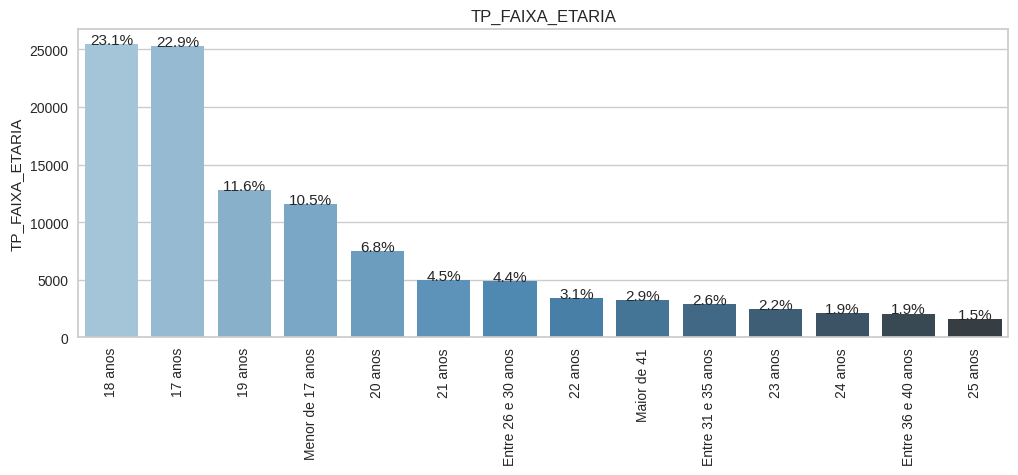

In [180]:
grafico_barras(df_enem_dic,"TP_FAIXA_ETARIA",11)

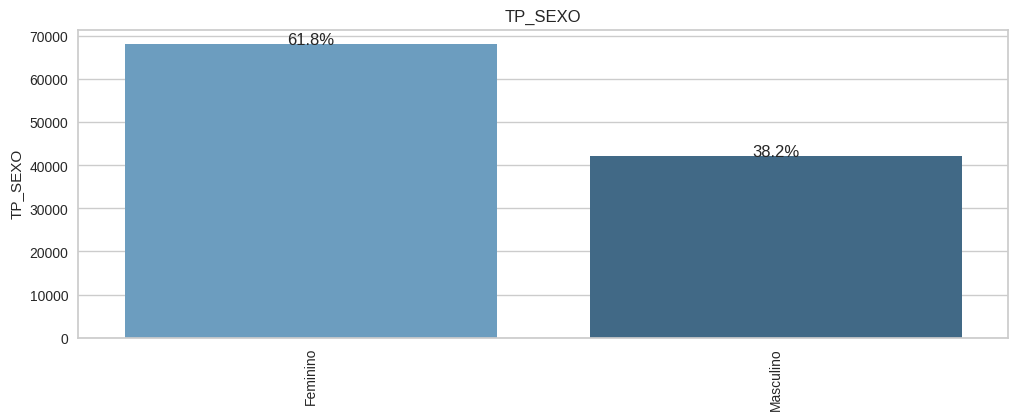

In [181]:
grafico_barras(df_enem_dic,'TP_SEXO',12)

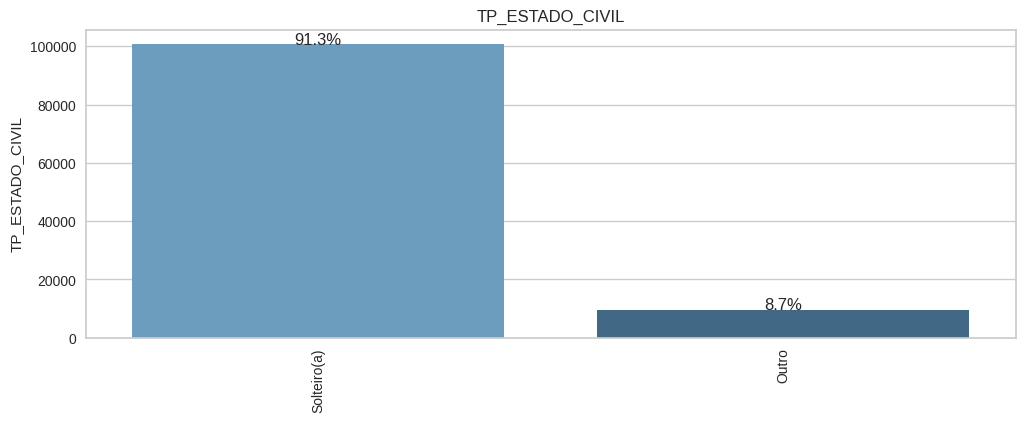

In [182]:
grafico_barras(df_enem_dic,'TP_ESTADO_CIVIL',12)

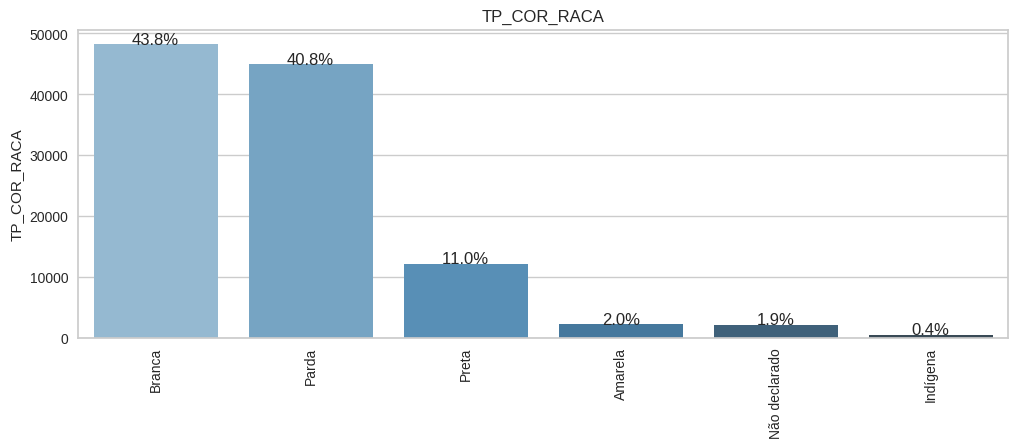

In [183]:
grafico_barras(df_enem_dic,'TP_COR_RACA',12)

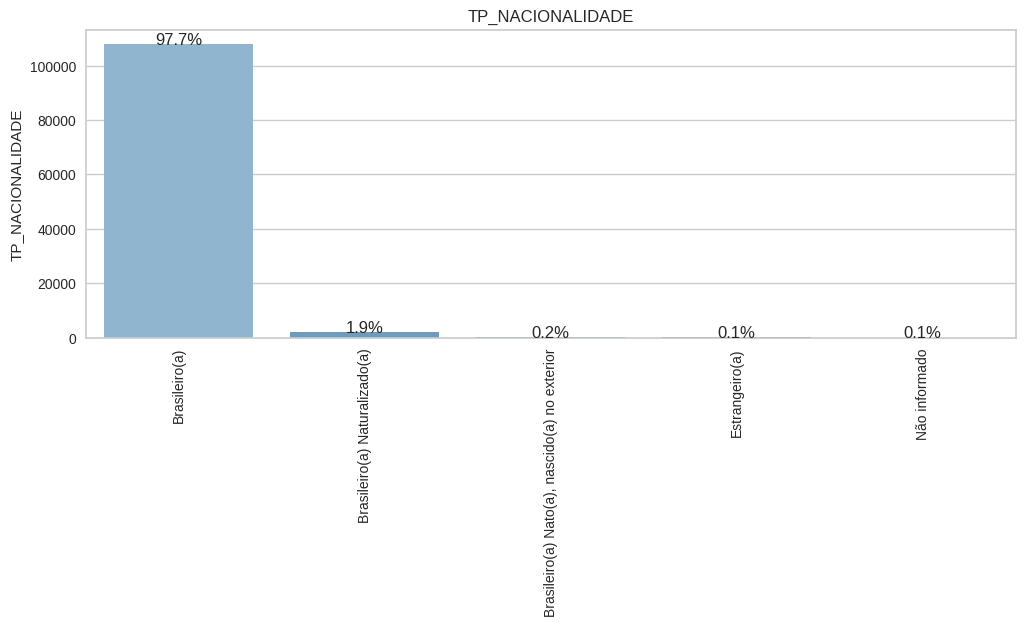

In [184]:
grafico_barras(df_enem_dic,'TP_NACIONALIDADE',12)

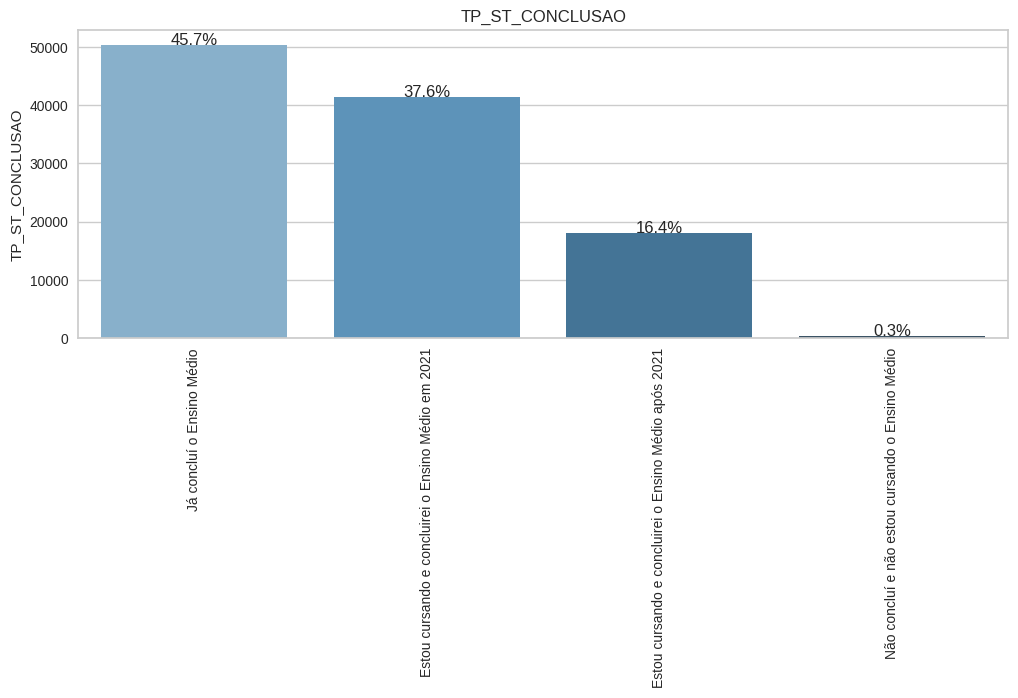

In [185]:
grafico_barras(df_enem_dic,'TP_ST_CONCLUSAO',12)

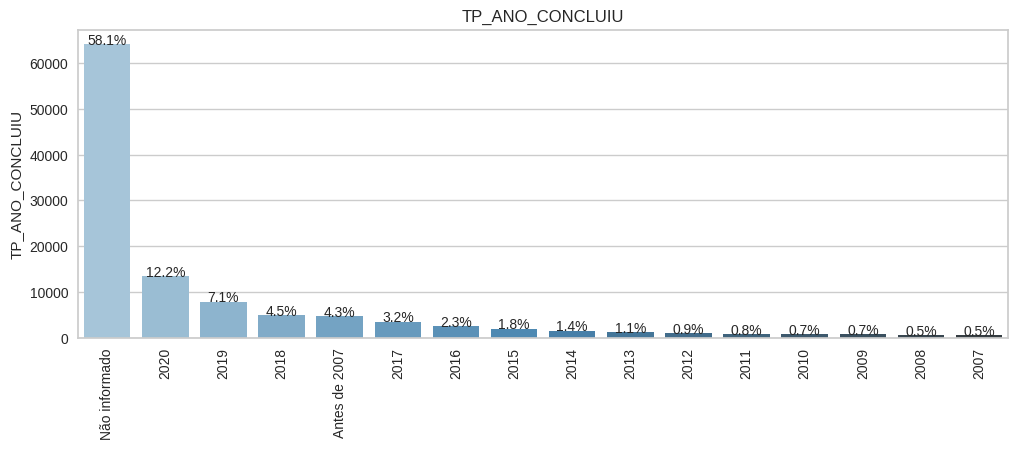

In [186]:
grafico_barras(df_enem_dic,'TP_ANO_CONCLUIU',10)

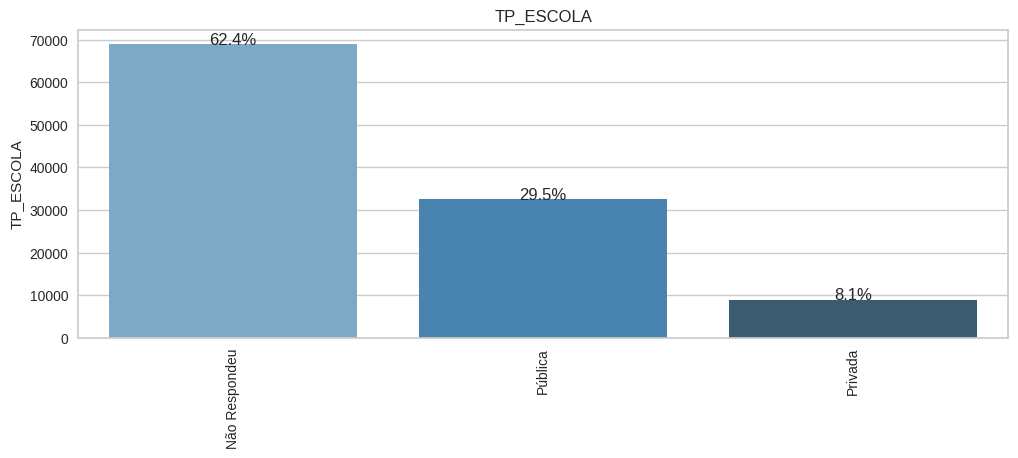

In [187]:
grafico_barras(df_enem_dic,'TP_ESCOLA',12)

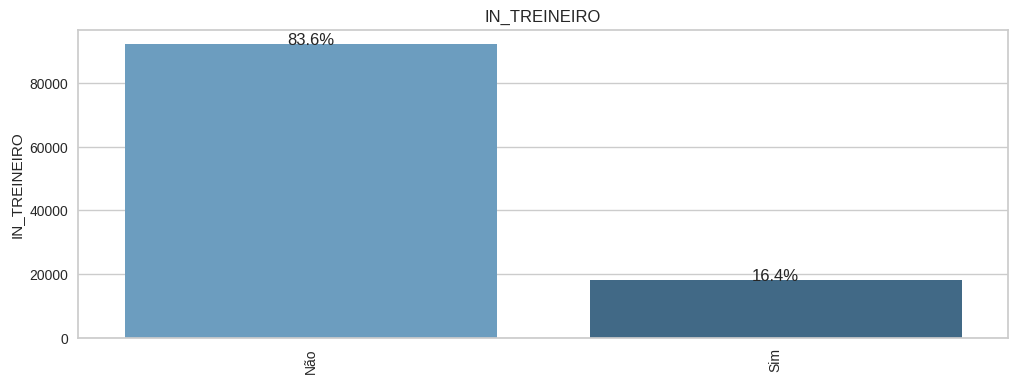

In [188]:
grafico_barras(df_enem_dic,'IN_TREINEIRO',12)

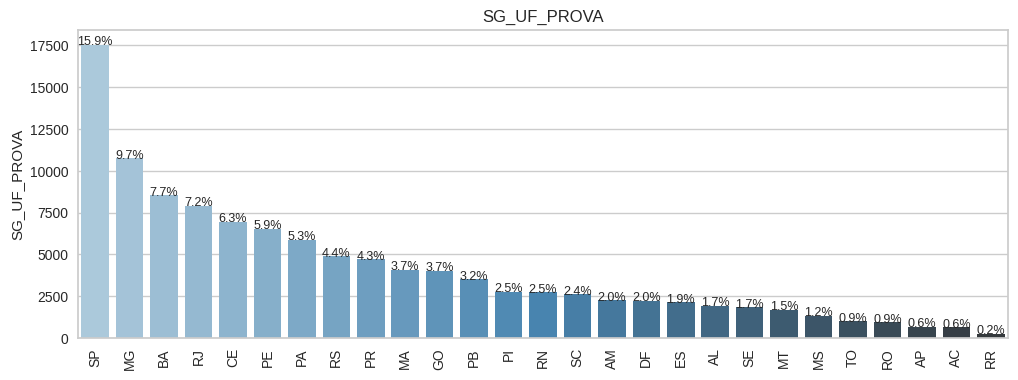

In [189]:
grafico_barras(df_enem_dic,'SG_UF_PROVA',9)


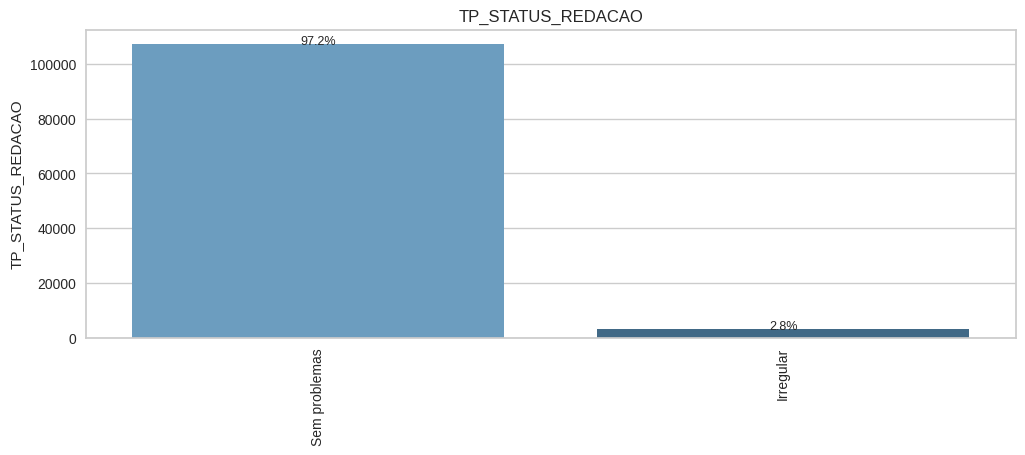

In [190]:
grafico_barras(df_enem_dic,'TP_STATUS_REDACAO',9)

In [191]:
def analisar_colunas_categoricas(data, colunas):
    pd.set_option('display.max_colwidth', 60)
    for coluna in colunas:
        counts = data[coluna].value_counts(normalize=True) * 100
        table = pd.DataFrame({'Categoria': counts.index, 'Percentual': counts.values})
        table = table.round(2)
        print(f'\n[ {coluna} ]')
        print()
        print(table)
        print()
        print("#"*50)
        print()


data = df_enem_dic

colunas = ['Até que série seu pai estudou?', 'Até que série sua mãe estudou?',
           'Ocupação mais próxima da ocupação do seu pai',
           'Ocupação mais próxima da ocupação da sua mãe',
           ]


analisar_colunas_categoricas(data, colunas)


[ Até que série seu pai estudou? ]

                                                     Categoria  Percentual
0     Completou o Ensino Médio, mas não completou a Faculdade.       30.40
1       Não completou a 4ª série/5º ano do Ensino Fundamental.       15.64
2  Completou a 4ª série/5º ano, mas não completou a 8ª séri...       12.38
3    Completou a Faculdade, mas não completou a Pós-graduação.       11.07
4  Completou a 8ª série/9º ano do Ensino Fundamental, mas n...       10.99
5                                   Completou a Pós-graduação.        8.27
6                                                     Não sei.        7.81
7                                               Nunca estudou.        3.45

##################################################


[ Até que série sua mãe estudou? ]

                                                     Categoria  Percentual
0     Completou o Ensino Médio, mas não completou a Faculdade.       35.23
1    Completou a Faculdade, mas não completou a 

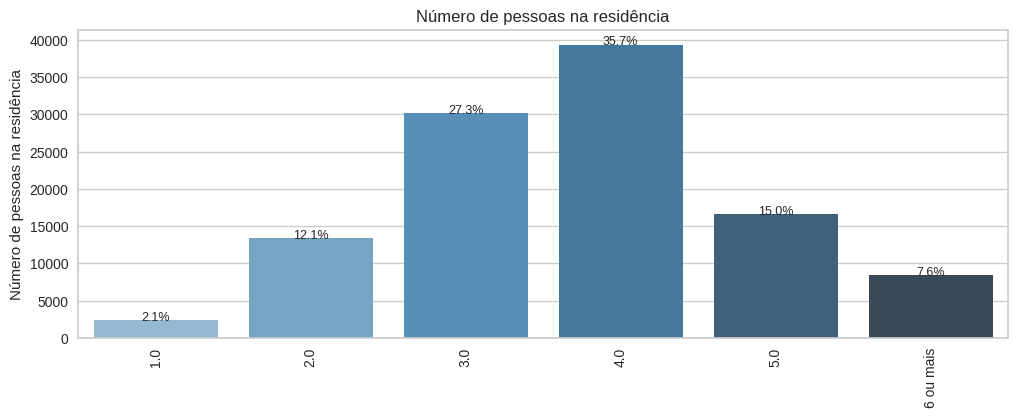

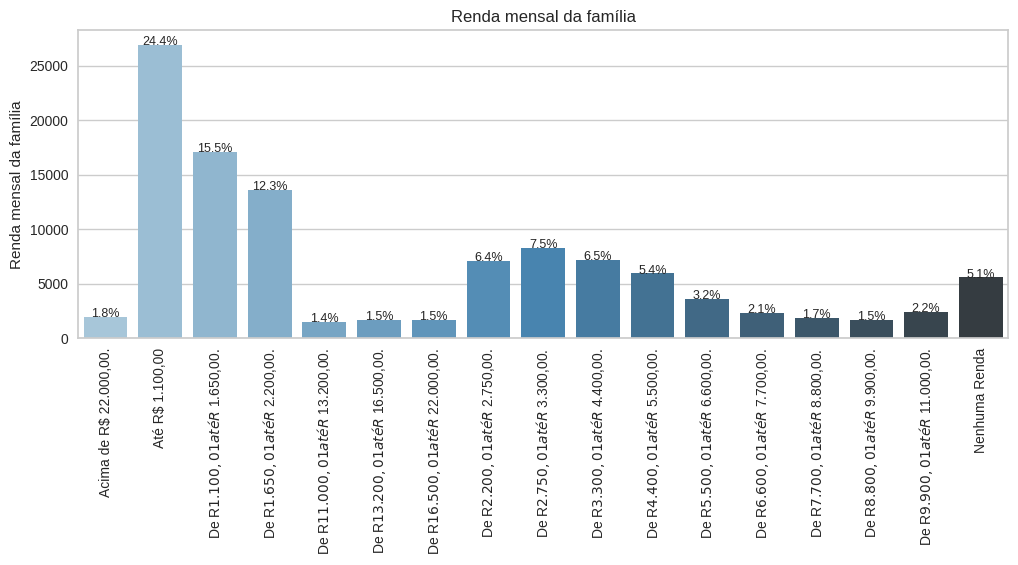

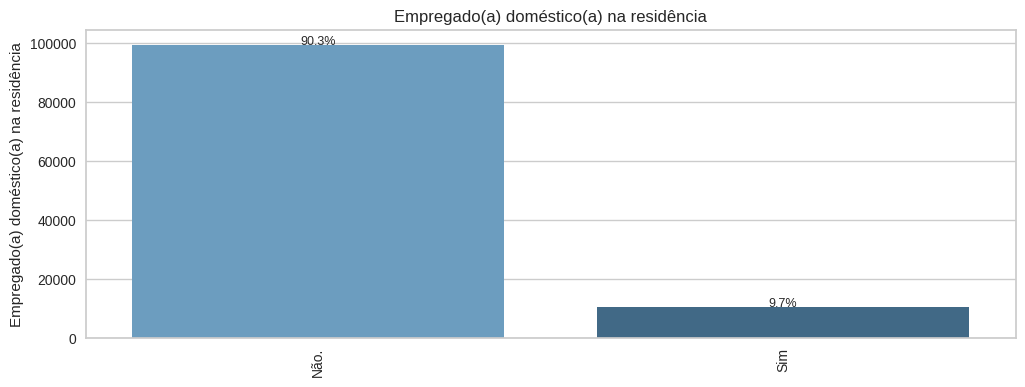

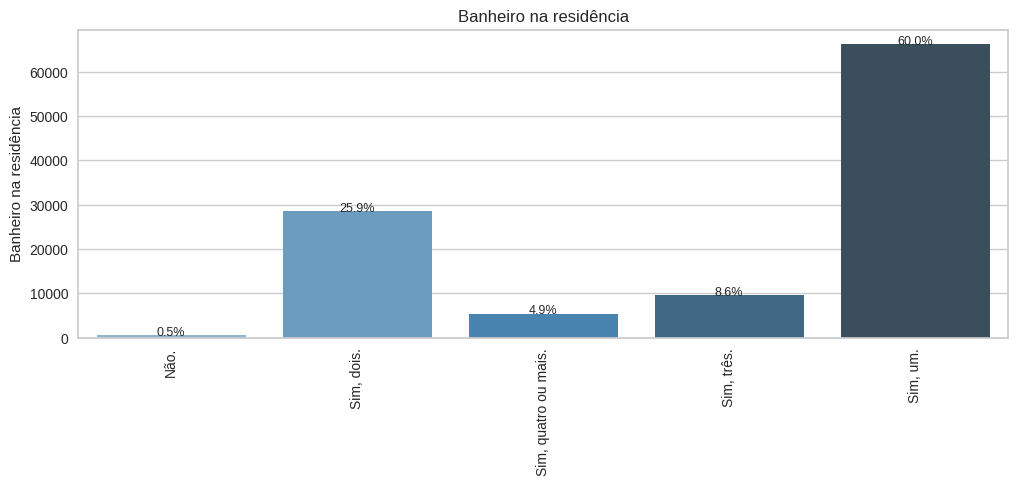

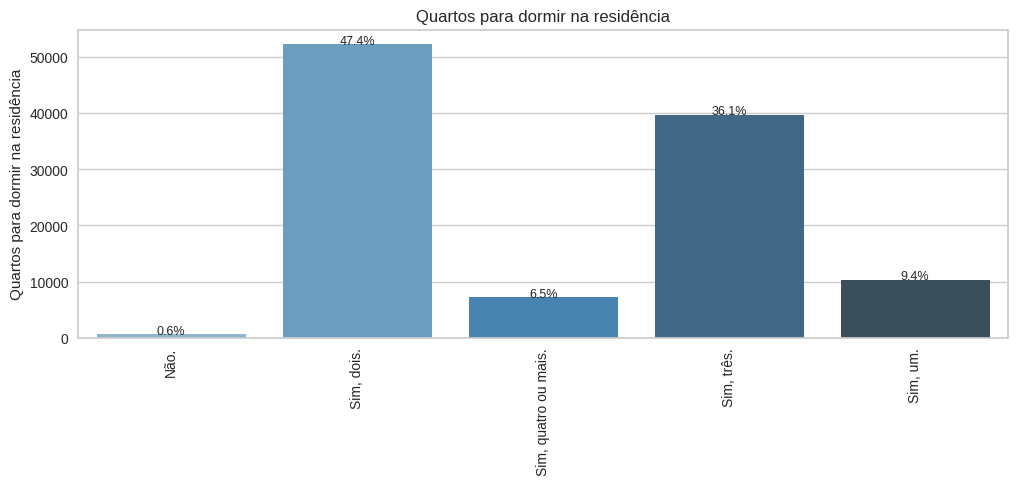

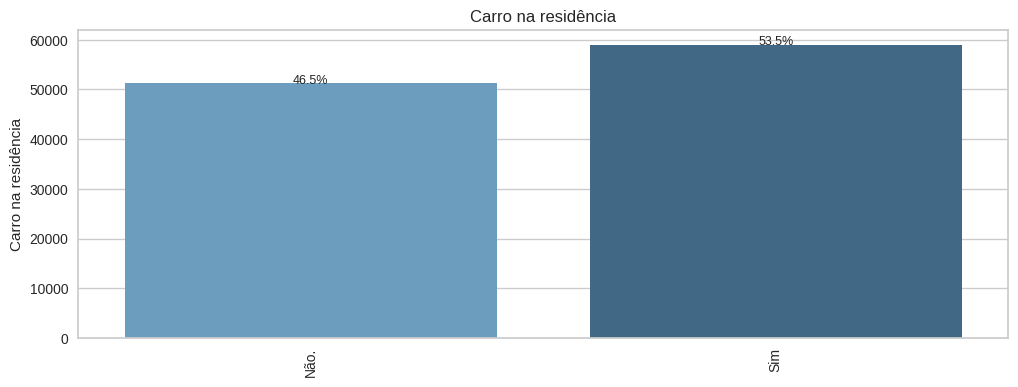

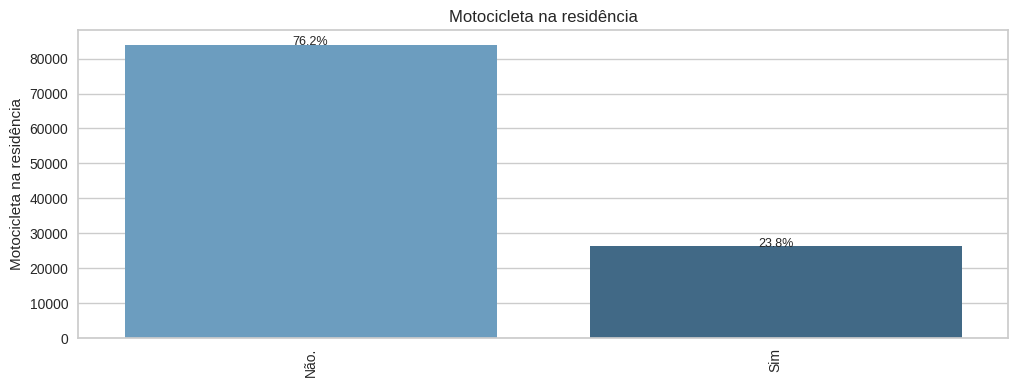

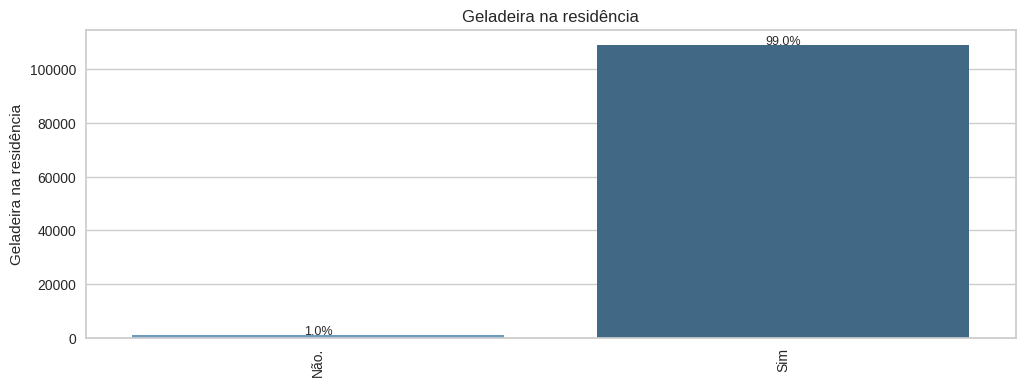

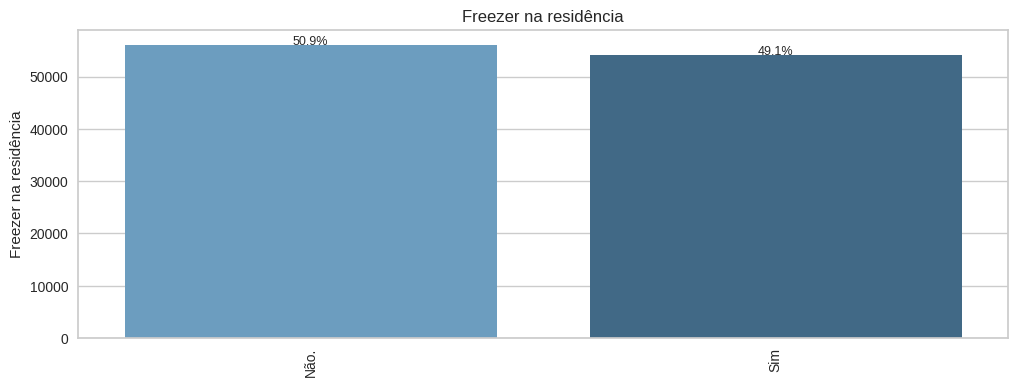

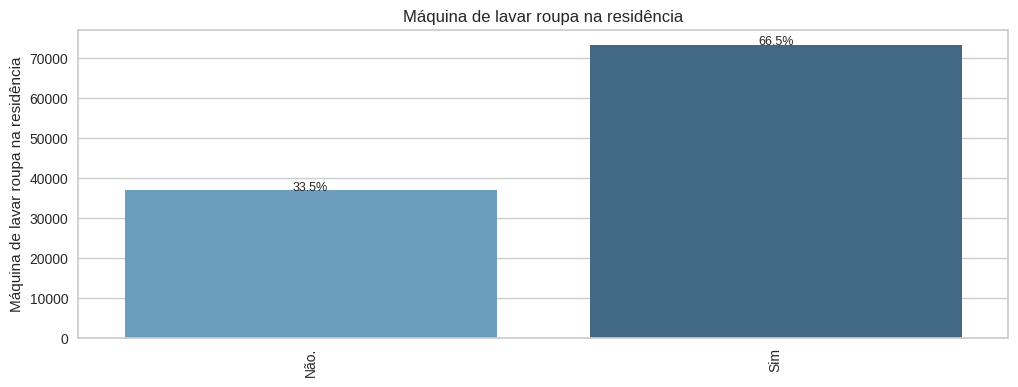

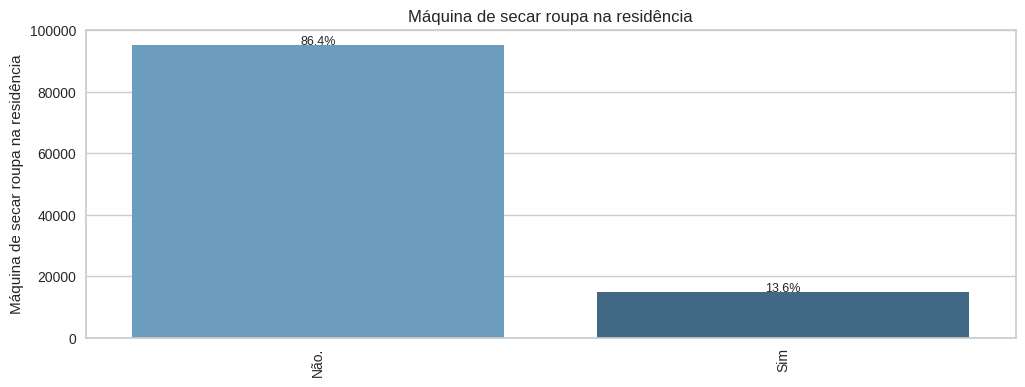

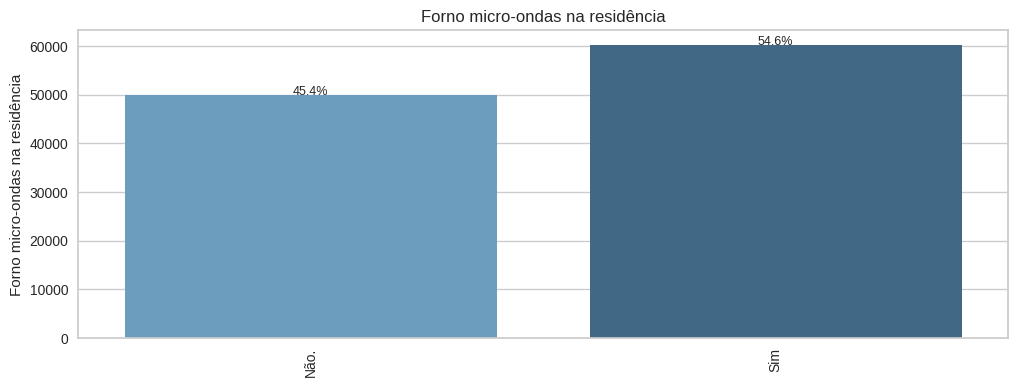

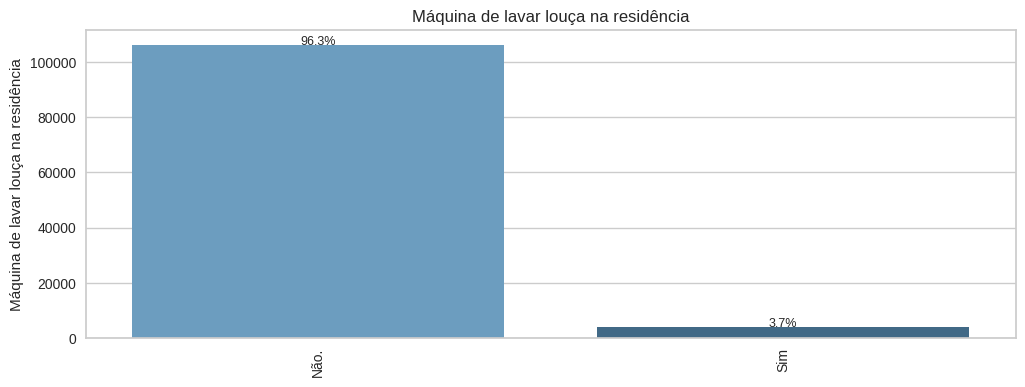

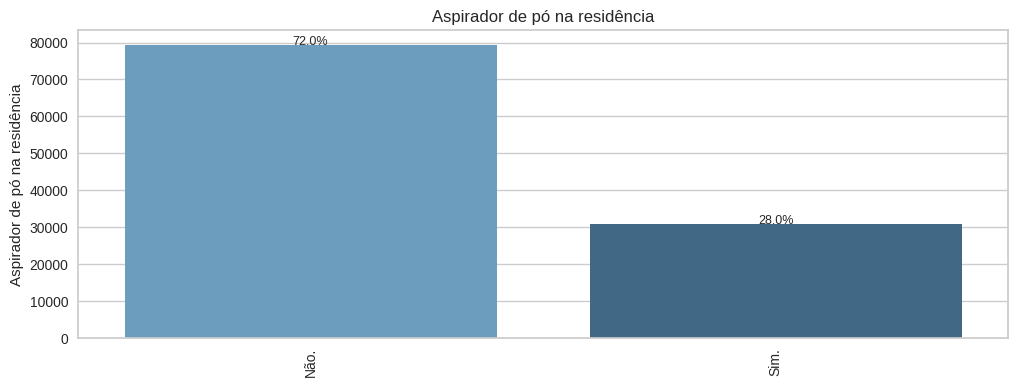

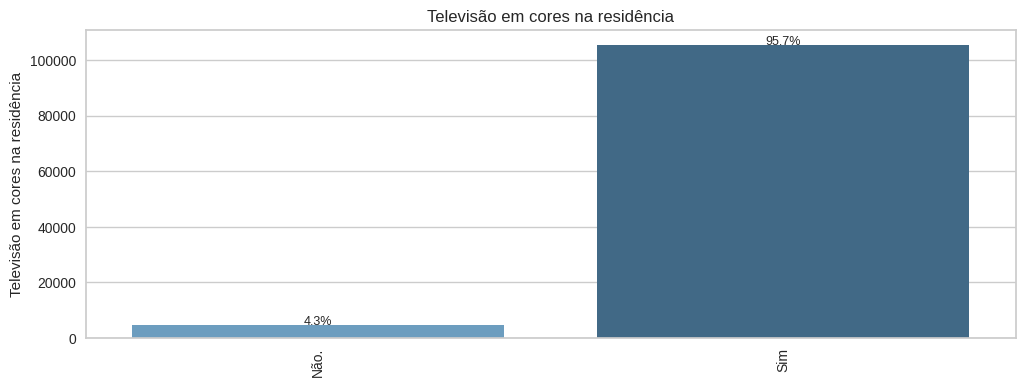

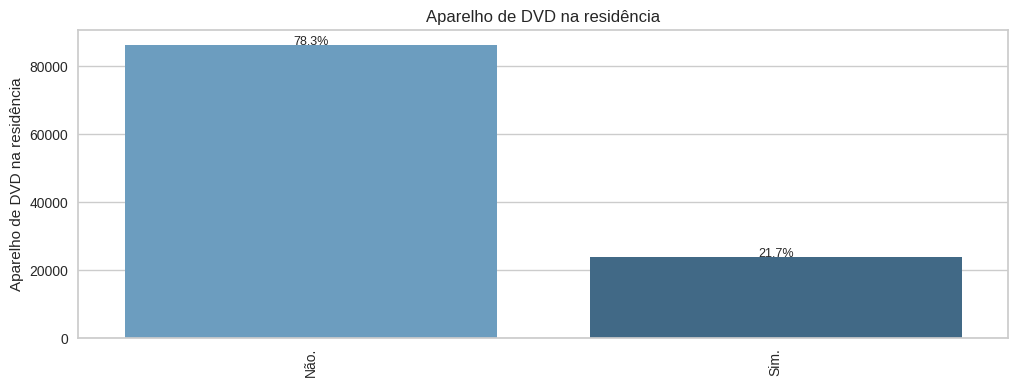

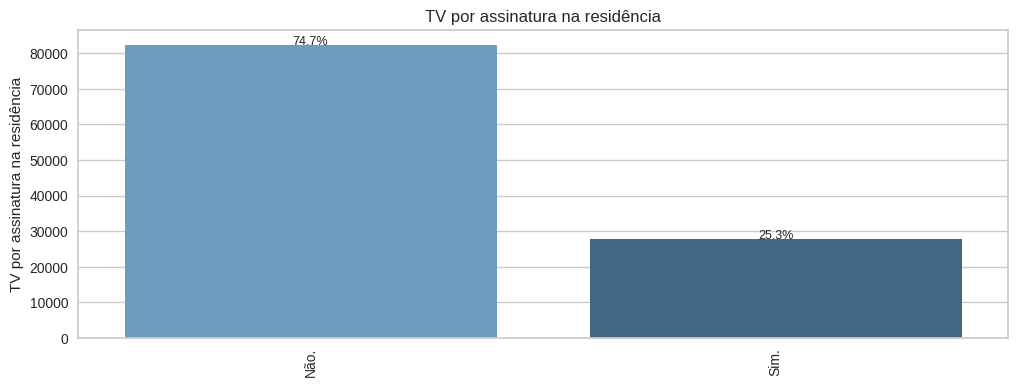

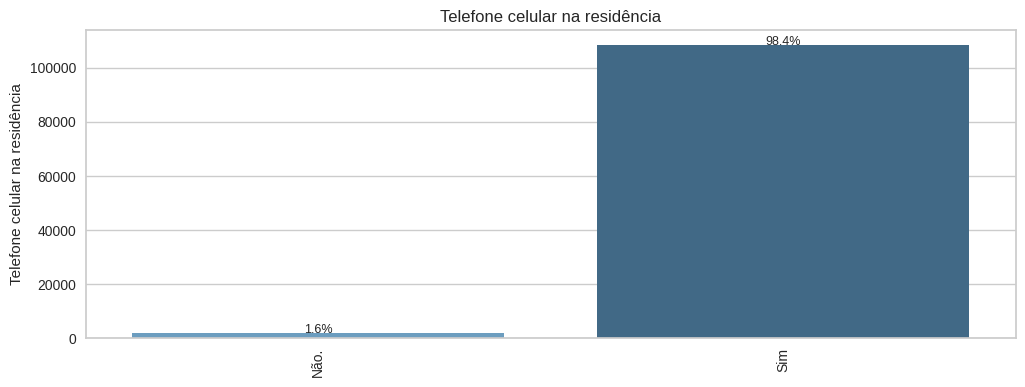

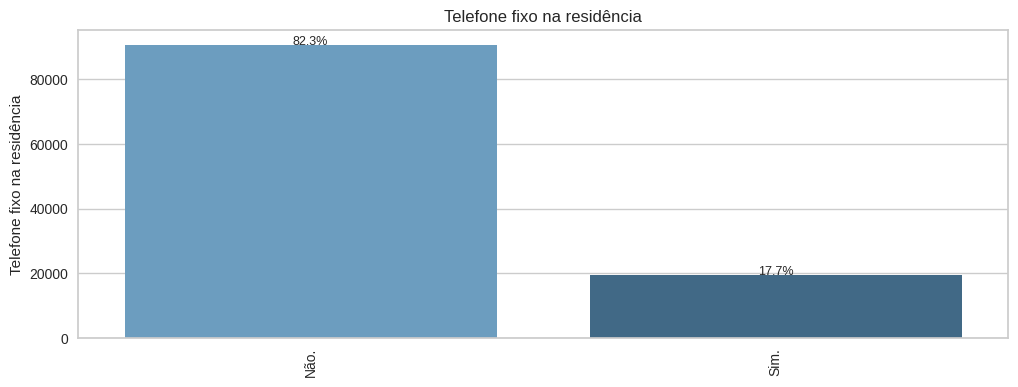

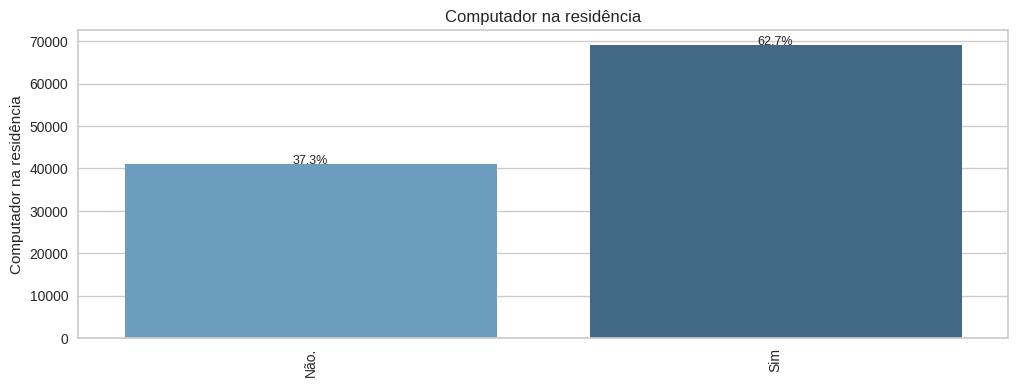

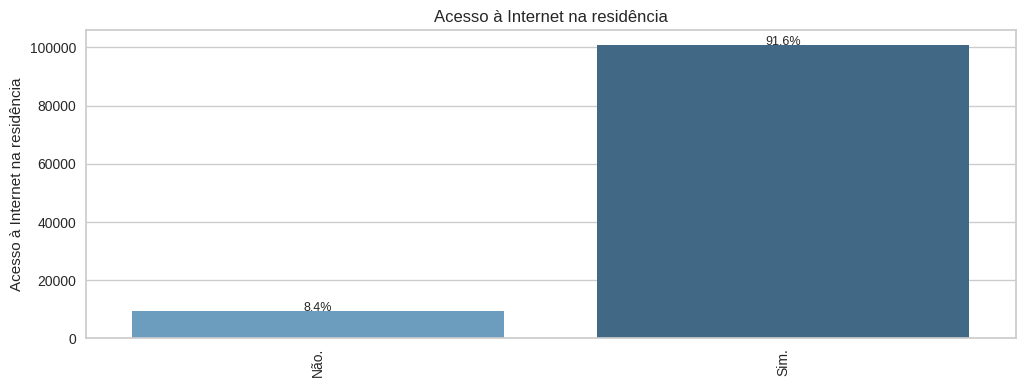

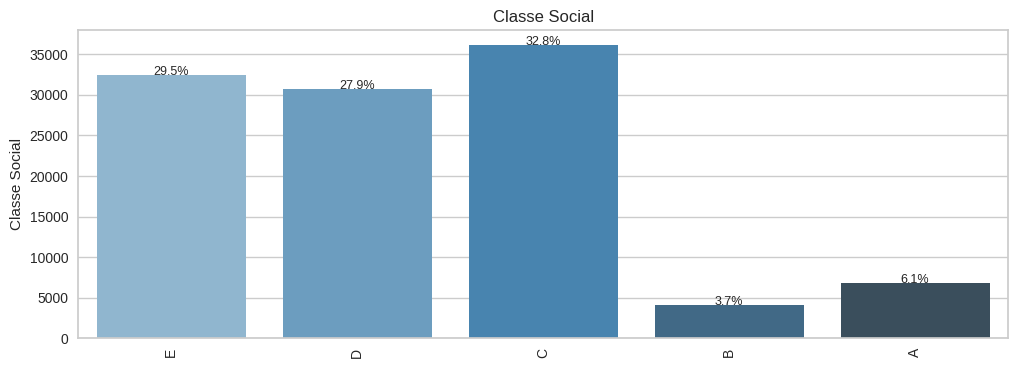

In [192]:
lista = ['Número de pessoas na residência', 'Renda mensal da família',
       'Empregado(a) doméstico(a) na residência', 'Banheiro na residência',
       'Quartos para dormir na residência', 'Carro na residência',
       'Motocicleta na residência', 'Geladeira na residência',
       'Freezer na residência', 'Máquina de lavar roupa na residência',
       'Máquina de secar roupa na residência',
       'Forno micro-ondas na residência',
       'Máquina de lavar louça na residência', 'Aspirador de pó na residência',
       'Televisão em cores na residência', 'Aparelho de DVD na residência',
       'TV por assinatura na residência', 'Telefone celular na residência',
       'Telefone fixo na residência', 'Computador na residência',
       'Acesso à Internet na residência','Classe Social']

for a in lista:
  grafico_barras(df_enem_dic,a,9)

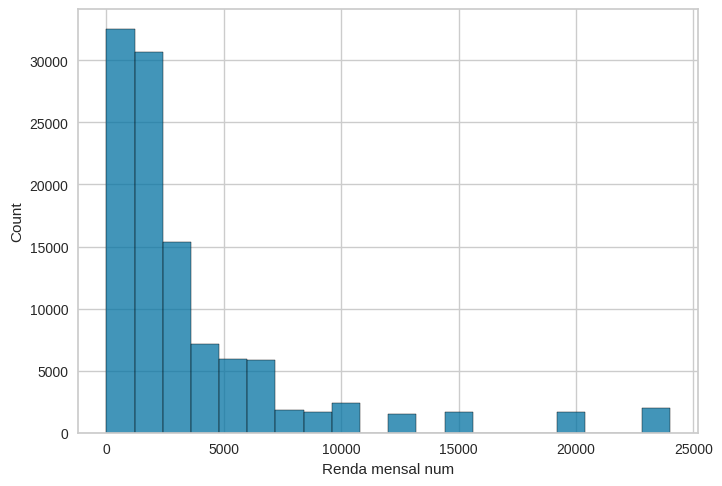

In [193]:
sns.histplot(df_enem_dic['Renda mensal num'], bins=20);

Baseado nestas informações podemos observar que:

Faixa Etária: A maioria dos participantes possui 18 ou 17 anos, representando aproximadamente 45% dos dados. Há também uma parcela significativa de participantes com 19 anos (11%) e menores de 17 anos (10%). O grupo de participantes com idade acima de 41 anos é relativamente pequeno (menos de 3%).

Sexo: A maioria dos participantes é do sexo feminino, representando cerca de 62% dos dados, enquanto o sexo masculino representa aproximadamente 38%.

Cor/Raça: A maioria dos participantes se identifica como branca (44%) ou parda (41%). A categoria preta representa 11% dos participantes, seguida por amarela (2%) e indígena (0,45%). Além disso, cerca de 2% dos participantes não declararam sua cor/raça.

Ano de Conclusão do Ensino Médio: Mais da metade dos participantes (58%) não informou o ano de conclusão do ensino médio. Entre aqueles que informaram, o ano de 2020 é o mais comum, representando aproximadamente 12% dos participantes. Outros anos, como 2019, 2018 e anteriores a 2007, também estão presentes em menor proporção.

Tipo de Escola: A maioria dos participantes (62%) não respondeu sobre o tipo de escola que frequentou. Entre aqueles que responderam, cerca de 29% frequentaram escolas públicas, enquanto 8% frequentaram escolas privadas.

Estado de Prova: Os estados com maior representação entre os participantes são São Paulo (16%), Minas Gerais (10%) e Bahia (8%). Esses estados têm uma quantidade significativa de participantes em relação aos demais estados

Nível de Escolaridade do Pai: A maioria dos pais dos participantes completou o Ensino Médio, mas não completou a Faculdade (30.40%). Também é significativo o número de pais que não completaram a 4ª série/5º ano do Ensino Fundamental (15.64%) e aqueles que completaram a 4ª série/5º ano, mas não completaram a 8ª série/9º ano (12.38%).

Nível de Escolaridade da Mãe: A maioria das mães dos participantes completou o Ensino Médio, mas não completou a Faculdade (35.23%). Também é relevante o número de mães que completaram a Faculdade, mas não completaram a Pós-graduação (14.39%), e aquelas que completaram a Pós-graduação (14.01%).

Ocupação mais Próxima do Pai: As ocupações mais próximas da ocupação do pai variam entre diferentes grupos. O grupo com maior representatividade é o Grupo 4: Professor (23.45%), seguido pelo Grupo 3: Padeiro, cozinheiro industrial ou em restaurante (22.27%) e o Grupo 2: Diarista, empregado doméstico, cuidador de idoso (19.09%).

Ocupação mais Próxima da Mãe: As ocupações mais próximas da ocupação da mãe também variam entre diferentes grupos. O grupo com maior representatividade é o Grupo 2: Diarista, empregada doméstica, cuidadora de idosos (38.56%), seguido pelo Grupo 4: Professora (28.23%) e o Grupo 1: Lavradora, agricultora sem empregados, bóia fria (12.92%).

Renda Mensal da Família: A maior proporção de famílias tem uma renda mensal de até R$ 1.100,00 (24.42%). Outras faixas de renda também estão presentes, como de R$ 1.100,01 até R$ 1.650,00 (15.52%) e de R$ 1.650,01 até R$ 2.200,00 (12.33%).

Características da Residência: A maioria das residências possui um banheiro (59.99%) e dois quartos para dormir (47.44%). A presença de carro na residência é relativamente alta, com 53.53% das famílias possuindo um carro. Além disso, a maioria das residências possui geladeira (98.96%) e acesso à internet (91.57%).

Ciências da Natureza (NU_NOTA_CN): A média das notas é de aproximadamente 491.73, com um desvio padrão de 80.19. A nota mínima é 0.0 e a nota máxima é 867.1. A distribuição das notas é variada, com a mediana (50%) sendo 482.2.

Ciências Humanas (NU_NOTA_CH): A média das notas é de aproximadamente 523.03, com um desvio padrão de 94.39. A nota mínima é 0.0 e a nota máxima é 846.9. A distribuição das notas é variada, com a mediana (50%) sendo 525.9.

Linguagens e Códigos (NU_NOTA_LC): A média das notas é de aproximadamente 504.82, com um desvio padrão de 77.94. A nota mínima é 0.0 e a nota máxima é 820.5. A distribuição das notas é variada, com a mediana (50%) sendo 508.0.

Matemática (NU_NOTA_MT): A média das notas é de aproximadamente 534.88, com um desvio padrão de 110.54. A nota mínima é 0.0 e a nota máxima é 953.1. A distribuição das notas é variada, com a mediana (50%) sendo 515.4.

Status da Redação (TP_STATUS_REDACAO): A maioria dos participantes (97.2%) não teve problemas com a redação, enquanto uma pequena proporção (2.8%) teve um status irregular.

Notas das Competências da Redação (NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5): As médias das notas nas competências variam entre 114.47 e 139.70, indicando diferentes desempenhos em cada competência. Os desvios padrão também variam, o que significa que as notas têm diferentes níveis de dispersão.

Nota Total da Redação (NU_NOTA_REDACAO): A média da nota total da redação é de aproximadamente 620.96, com um desvio padrão de 183.52. A nota mínima é 0.0 e a nota máxima é 980.0. A distribuição das notas é variada, com a mediana (50%) sendo 620.0.

## Redução de dimensionalidade 1

Antes de iniciar a análise bivariada irei eleger as colunas mais relevantes atravez da avaliação da correlação de cada coluna onehot com a variável resposta, correlações em que todas as possibilidades de respostas forem abaixo de 0.1 serão consideradas baixas e não entrarão na análise

In [194]:
cadastrais = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'SG_UF_PROVA']
socio_economicas = ['Até que série seu pai estudou?', 'Até que série sua mãe estudou?',
       'Ocupação mais próxima da ocupação do seu pai',
       'Ocupação mais próxima da ocupação da sua mãe',
       'Número de pessoas na residência', 'Renda mensal da família',
       'Empregado(a) doméstico(a) na residência', 'Banheiro na residência',
       'Quartos para dormir na residência', 'Carro na residência',
       'Motocicleta na residência', 'Geladeira na residência',
       'Freezer na residência', 'Máquina de lavar roupa na residência',
       'Máquina de secar roupa na residência',
       'Forno micro-ondas na residência',
       'Máquina de lavar louça na residência', 'Aspirador de pó na residência',
       'Televisão em cores na residência', 'Aparelho de DVD na residência',
       'TV por assinatura na residência', 'Telefone celular na residência',
       'Telefone fixo na residência', 'Computador na residência',
       'Acesso à Internet na residência',
       'Classe Social']

In [195]:
df_onehot = pd.get_dummies(df_enem_dic, columns=cadastrais)
df = df_onehot
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110234 entries, 1 to 168977
Columns: 121 entries, NO_MUNICIPIO_PROVA to SG_UF_PROVA_TO
dtypes: category(26), float64(12), object(2), uint8(81)
memory usage: 23.9+ MB


In [196]:
correlation_matrix = df.corr()
limite_correlacao = 0.1
colunas_irrelevantes = correlation_matrix[abs(correlation_matrix['NU_MEDIA']) < limite_correlacao].index
df_relevante = df.drop(colunas_irrelevantes, axis=1)
print()
print("Colunas irrelevantes:")
print(colunas_irrelevantes.to_list())



Colunas irrelevantes:
['TP_FAIXA_ETARIA_17 anos', 'TP_FAIXA_ETARIA_18 anos', 'TP_FAIXA_ETARIA_19 anos', 'TP_FAIXA_ETARIA_20 anos', 'TP_FAIXA_ETARIA_21 anos', 'TP_FAIXA_ETARIA_22 anos', 'TP_FAIXA_ETARIA_23 anos', 'TP_FAIXA_ETARIA_24 anos', 'TP_FAIXA_ETARIA_25 anos', 'TP_FAIXA_ETARIA_Entre 26 e 30 anos', 'TP_FAIXA_ETARIA_Entre 31 e 35 anos', 'TP_FAIXA_ETARIA_Entre 36 e 40 anos', 'TP_FAIXA_ETARIA_Maior de 41', 'TP_FAIXA_ETARIA_Menor de 17 anos', 'TP_SEXO_Feminino', 'TP_SEXO_Masculino', 'TP_ESTADO_CIVIL_Outro', 'TP_ESTADO_CIVIL_Solteiro(a)', 'TP_COR_RACA_Amarela', 'TP_COR_RACA_Indígena', 'TP_COR_RACA_Não declarado', 'TP_COR_RACA_Preta', 'TP_NACIONALIDADE_Brasileiro(a)', 'TP_NACIONALIDADE_Brasileiro(a) Nato(a), nascido(a) no exterior', 'TP_NACIONALIDADE_Brasileiro(a) Naturalizado(a)', 'TP_NACIONALIDADE_Estrangeiro(a)', 'TP_NACIONALIDADE_Não informado', 'TP_ST_CONCLUSAO_Estou cursando e concluirei o Ensino Médio após 2021', 'TP_ST_CONCLUSAO_Estou cursando e concluirei o Ensino Médio em 2021

In [197]:
df_onehot = pd.get_dummies(df_enem_dic, columns=socio_economicas)
df = df_onehot
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110234 entries, 1 to 168977
Columns: 124 entries, TP_FAIXA_ETARIA to Classe Social_A
dtypes: float64(12), object(12), uint8(100)
memory usage: 31.5+ MB


In [198]:
correlation_matrix = df.corr()
limite_correlacao = 0.1
colunas_irrelevantes = correlation_matrix[abs(correlation_matrix['NU_MEDIA']) < limite_correlacao].index
df_relevante = df.drop(colunas_irrelevantes, axis=1)
print()
print("Colunas irrelevantes:")
print(colunas_irrelevantes.to_list())


Colunas irrelevantes:
['Até que série seu pai estudou?_Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.', 'Até que série seu pai estudou?_Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.', 'Até que série seu pai estudou?_Completou o Ensino Médio, mas não completou a Faculdade.', 'Até que série seu pai estudou?_Não sei.', 'Até que série sua mãe estudou?_Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.', 'Até que série sua mãe estudou?_Completou o Ensino Médio, mas não completou a Faculdade.', 'Até que série sua mãe estudou?_Não sei.', 'Ocupação mais próxima da ocupação do seu pai_Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pe

Segundo o teste de correlação < que 0.1 as colunas que apresentaram menor valor foram:

'TP_FAIXA_ETARIA'

'TP_SEXO'

'TP_ESTADO_CIVIL'

'TP_NACIONALIDADE'

'TP_ST_CONCLUSAO'

'TP_ANO_CONCLUIU'

'IN_TREINEIRO'

'Número de pessoas na residência'

'Motocicleta na residência'

'Geladeira na residência'

'Televisão em cores na residência'

Para confirmar serão realizados os testes de quiquadrados

In [199]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [200]:
categorias_avaliar = ['TP_FAIXA_ETARIA',
'TP_SEXO',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'TP_ST_CONCLUSAO',
'TP_ANO_CONCLUIU',
'IN_TREINEIRO',
'Número de pessoas na residência',
'Motocicleta na residência',
'Geladeira na residência',
'Televisão em cores na residência']
for a in categorias_avaliar:
  contingency_table = pd.crosstab(df_enem_dic['NU_MEDIA'], df_enem_dic[a])
  stat, p, dof, expected = chi2_contingency(contingency_table)
  print(a)
  print('Estatística Qui-quadrado: %.3f' % stat)
  print('Valor p: %.3f' % p)
  print('Graus de liberdade: %d' % dof)
  print('Tabela de Frequências Esperadas:')
  print(expected)
  print()
  print()

TP_FAIXA_ETARIA
Estatística Qui-quadrado: 361865.253
Valor p: 0.000
Graus de liberdade: 356681
Tabela de Frequências Esperadas:
[[0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 ...
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]]


TP_SEXO
Estatística Qui-quadrado: 28177.488
Valor p: 0.001
Graus de liberdade: 27437
Tabela de Frequências Esperadas:
[[0.61767694 0.38232306]
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]
 ...
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]]


TP_ESTADO_CIVIL
Estatística Qui-quadrado: 26720.885
Valor p: 0.999
Graus de liberdade: 27437
Tabela de Frequências Esperadas:
[[0.08727797 0.91272203]

Com base no resultado dos testes, as variáveis que parecem ter uma associação estatisticamente significativa com a variável resposta são: TP_FAIXA_ETARIA, TP_SEXO, TP_ANO_CONCLUIU e Geladeira na residência, sendo mantidas no dataset para análise bivariada.

Já as variáveis TP_ESTADO_CIVIL, TP_NACIONALIDADE, TP_ST_CONCLUSAO, IN_TREINEIRO, Número de pessoas na residência, Motocicleta na residência e Televisão em cores na residência não apresentam associação estatisticamente significativa com a variável resposta.

O NO_MUNICIPIO_PROVA contem muitas categorias e representa as mesmas informações que a lista de estados, portanto a principio será removida.

As variáveis nota de cada matéria e desempenho da redação serão removidas por serem variáveis preditoras do NU_MEDIA e nesta análise nos interessa os dados socioeconômicos.

As colunas 'Renda mensal num', Renda mensal da família e 'Classe Social' representam a mesma informação portanto seguirei a análise apenas com o  Renda mensanl num por ser uma variável numérica.

A coluna TP_ESCOLA apresenta uma grande quantidade de valores não declarados, portanto irei remove-la dos próximos passos.

In [201]:
df_enem_dic = df_enem_dic.drop(['TP_ESTADO_CIVIL','TP_NACIONALIDADE','TP_ST_CONCLUSAO','IN_TREINEIRO', 'NO_MUNICIPIO_PROVA', 'Número de pessoas na residência', 'Motocicleta na residência','Televisão em cores na residência','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO','TP_ESCOLA', 'Renda mensal da família','Classe Social'],axis=1)

In [202]:
df_enem_dic.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ANO_CONCLUIU',
       'SG_UF_PROVA', 'Até que série seu pai estudou?',
       'Até que série sua mãe estudou?',
       'Ocupação mais próxima da ocupação do seu pai',
       'Ocupação mais próxima da ocupação da sua mãe',
       'Empregado(a) doméstico(a) na residência', 'Banheiro na residência',
       'Quartos para dormir na residência', 'Carro na residência',
       'Geladeira na residência', 'Freezer na residência',
       'Máquina de lavar roupa na residência',
       'Máquina de secar roupa na residência',
       'Forno micro-ondas na residência',
       'Máquina de lavar louça na residência', 'Aspirador de pó na residência',
       'Aparelho de DVD na residência', 'TV por assinatura na residência',
       'Telefone celular na residência', 'Telefone fixo na residência',
       'Computador na residência', 'Acesso à Internet na residência',
       'NU_MEDIA', 'Renda mensal num'],
      dtype='object')

## EDA bivariada

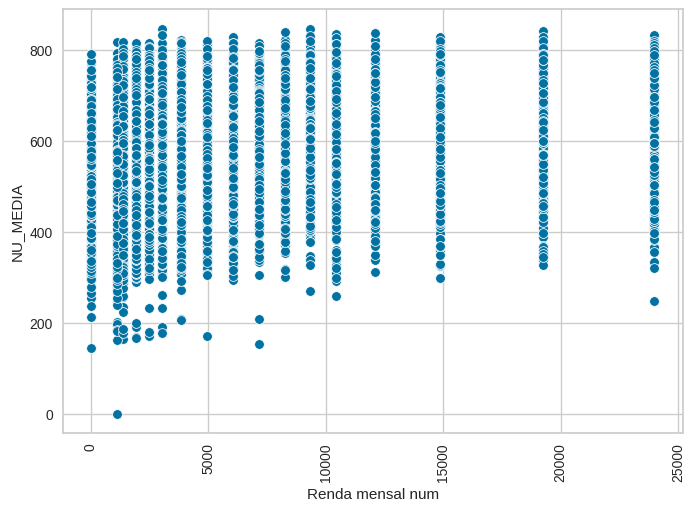

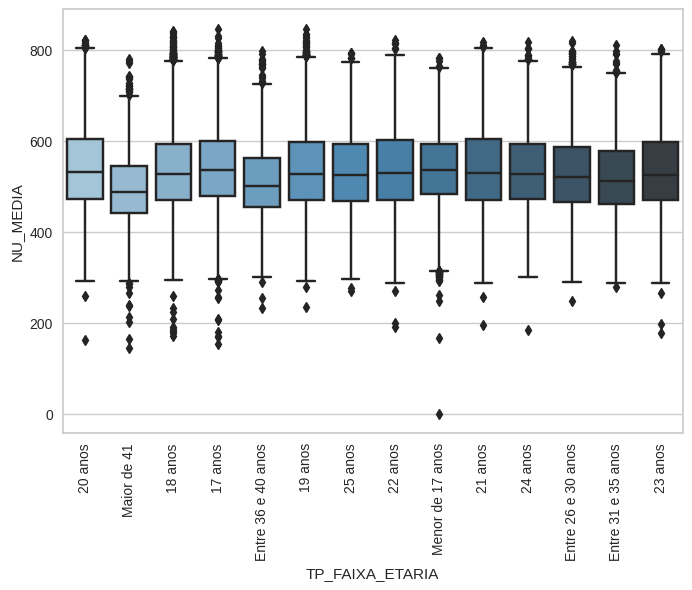

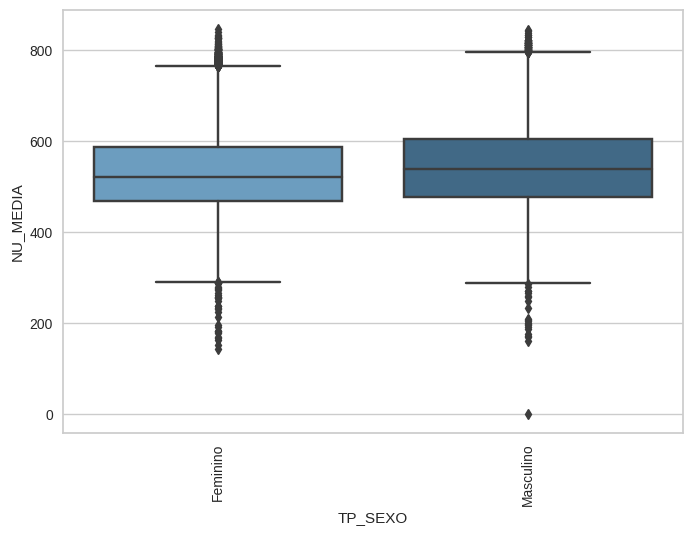

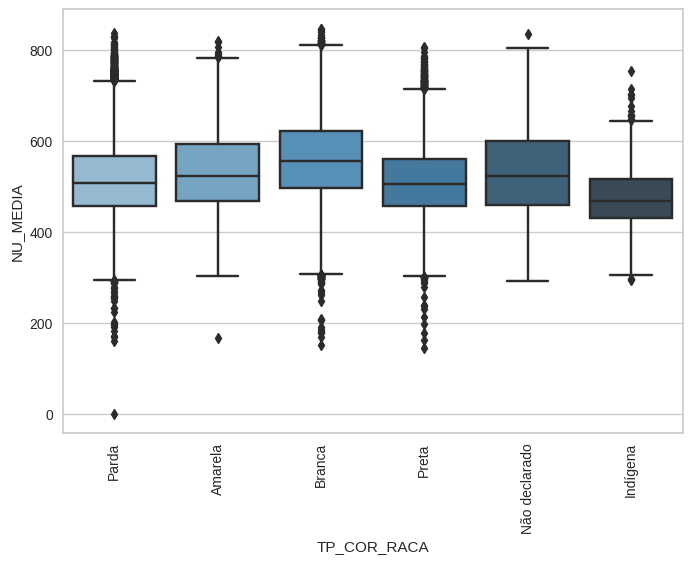

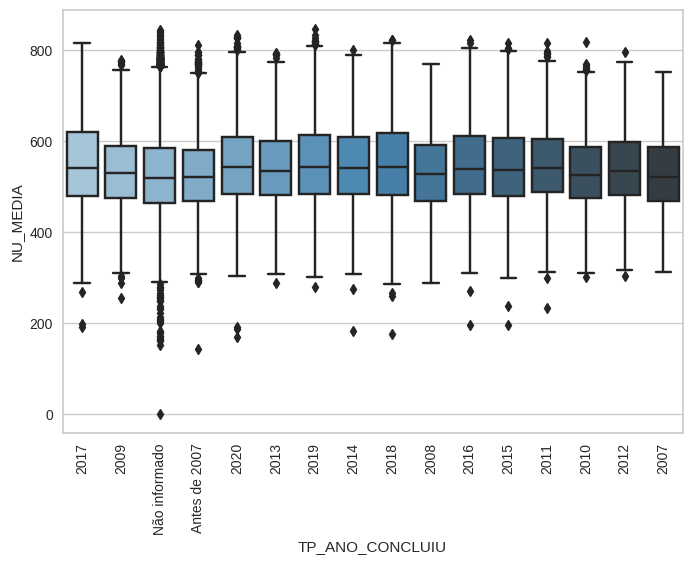

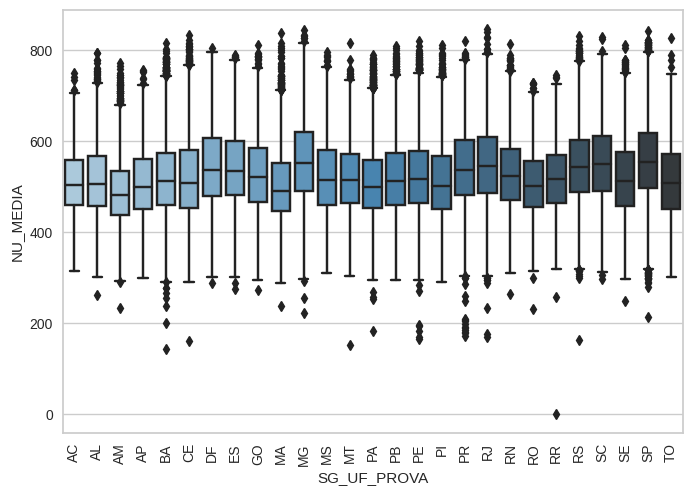

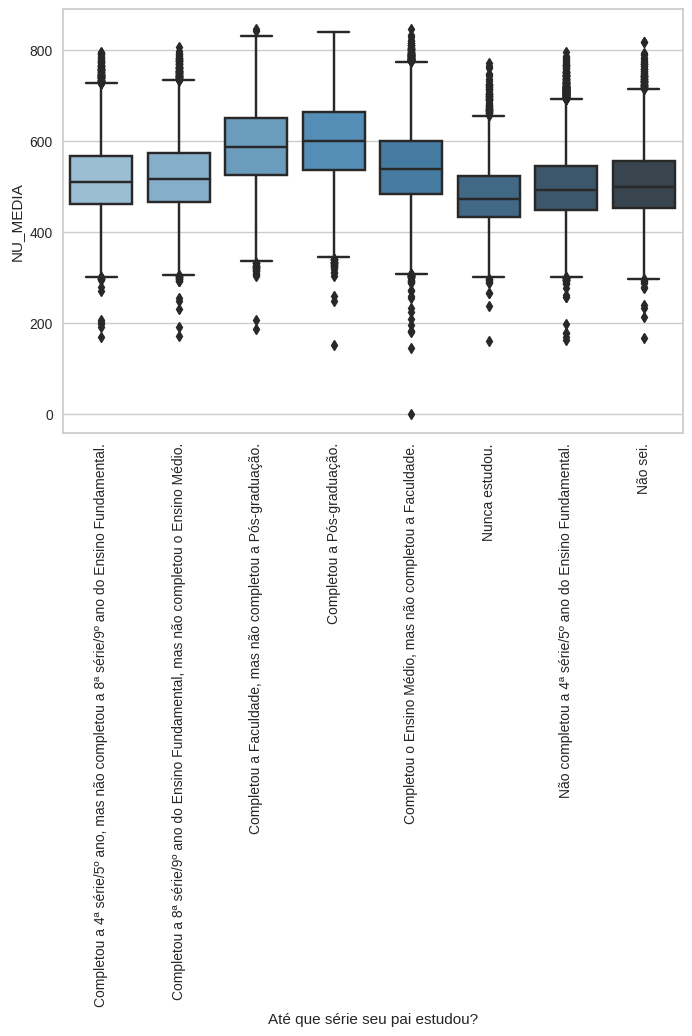

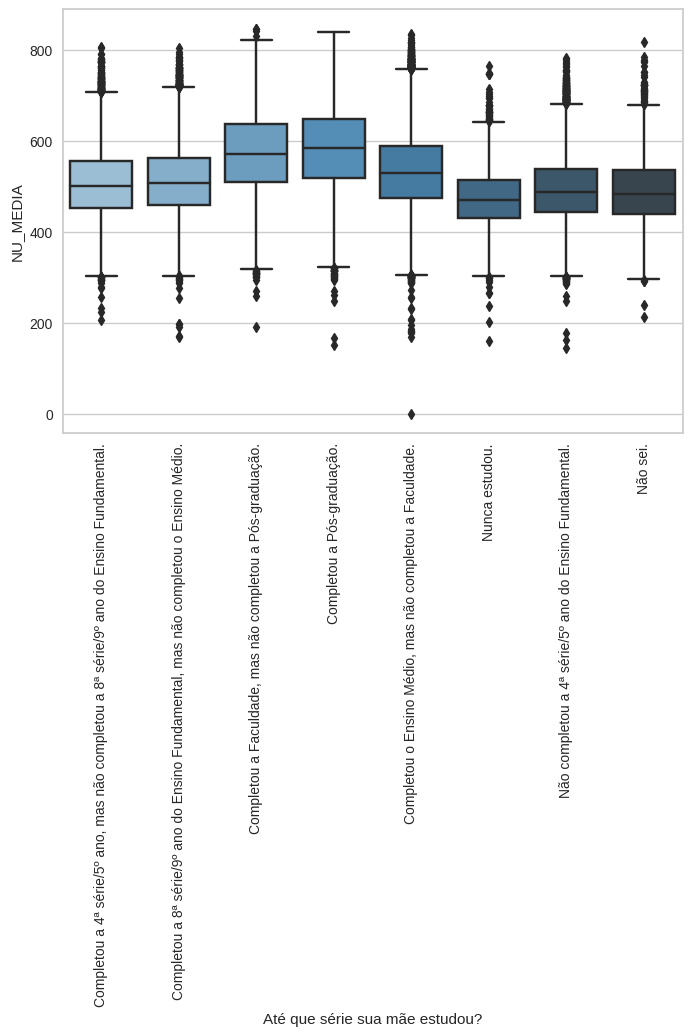

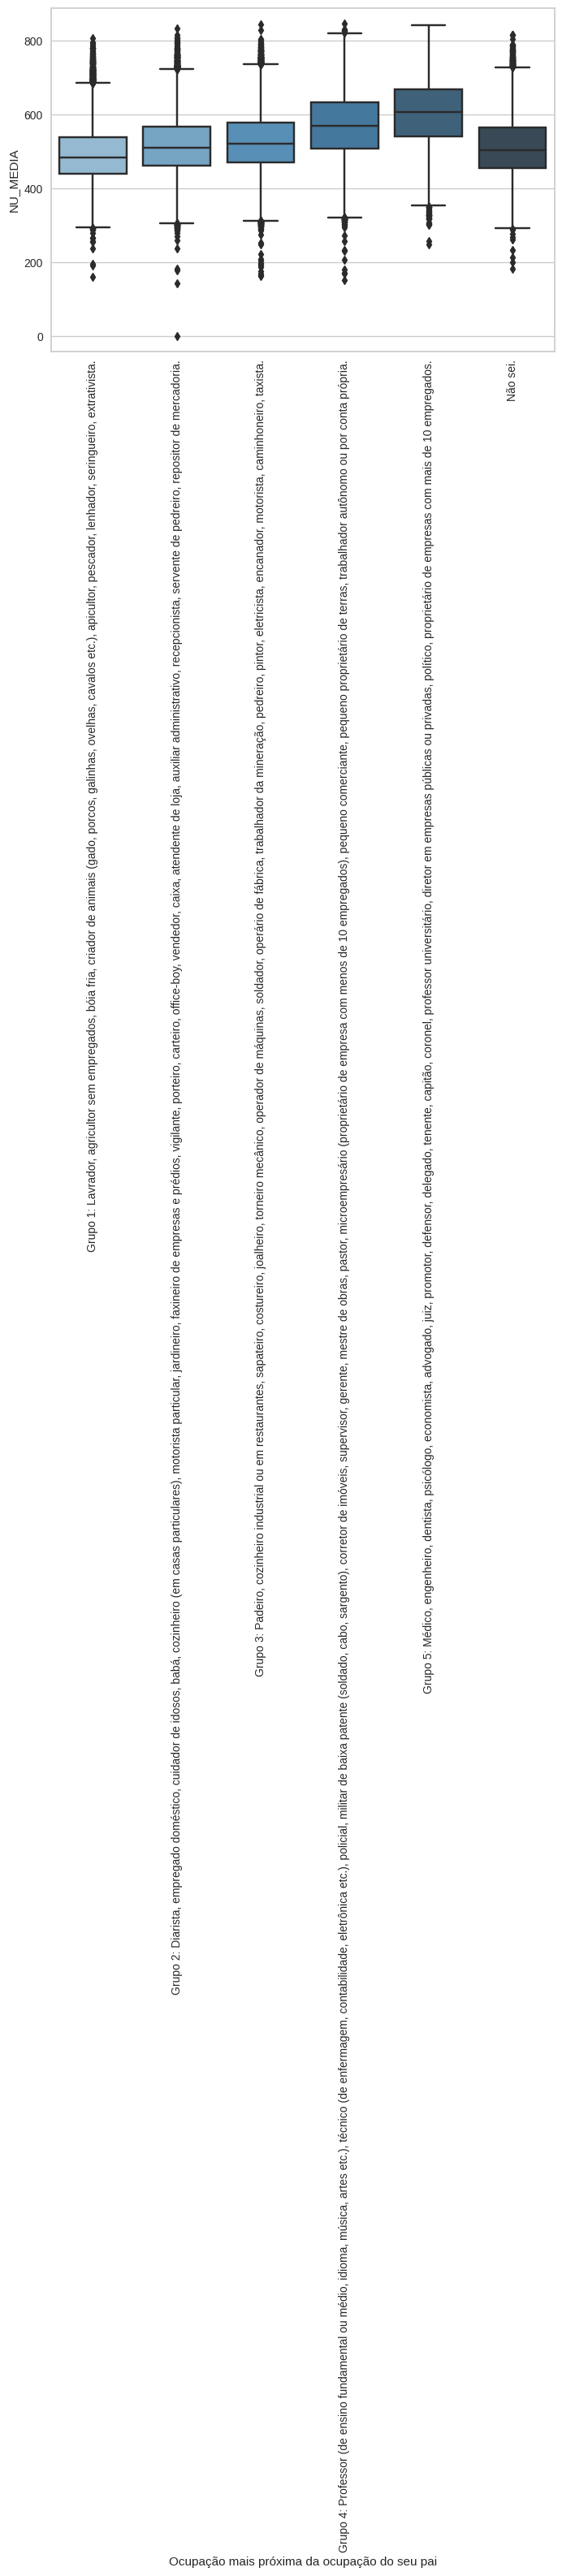

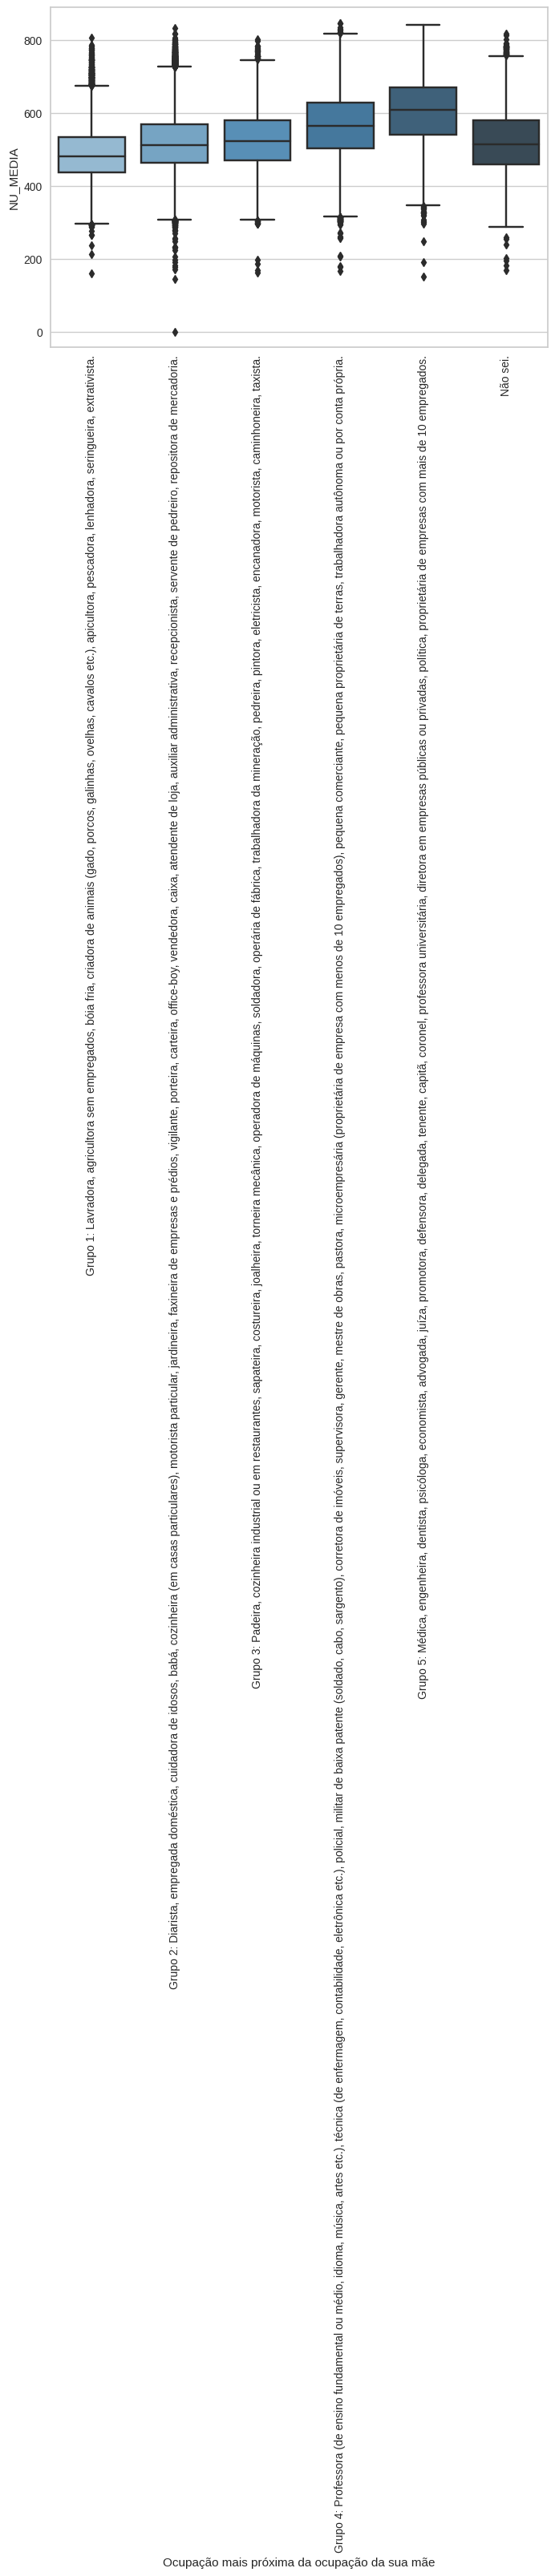

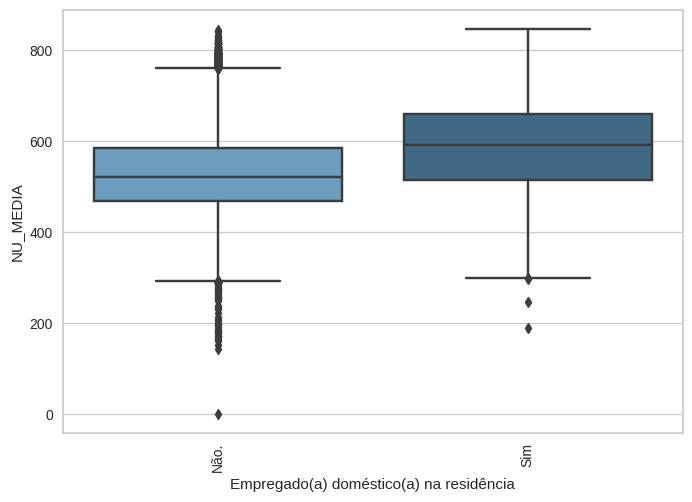

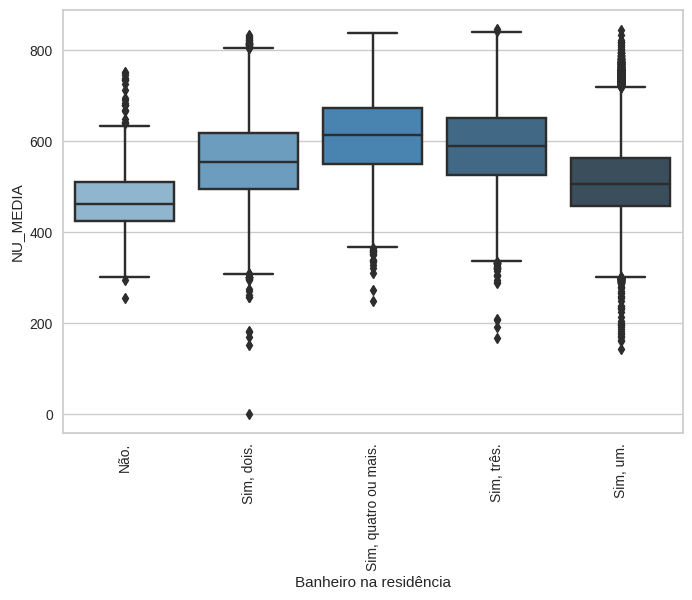

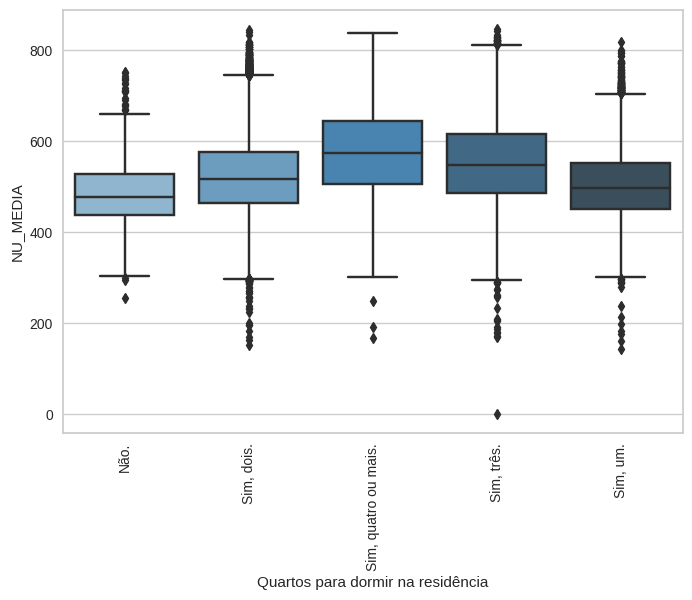

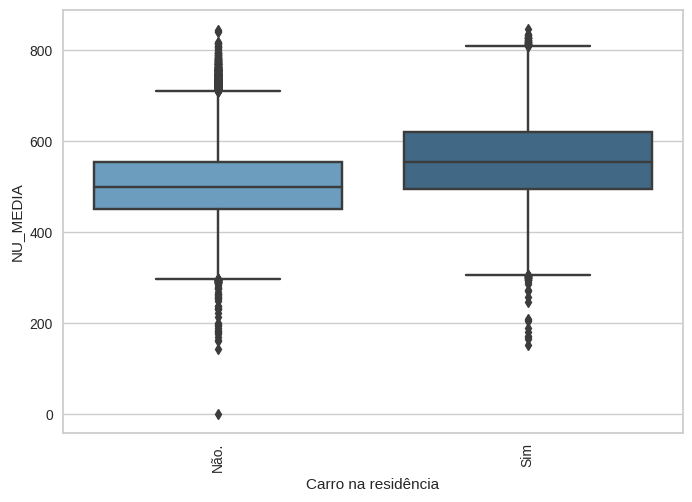

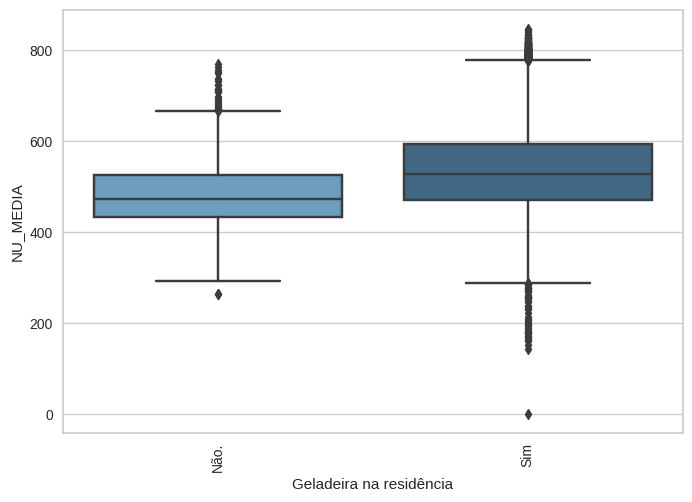

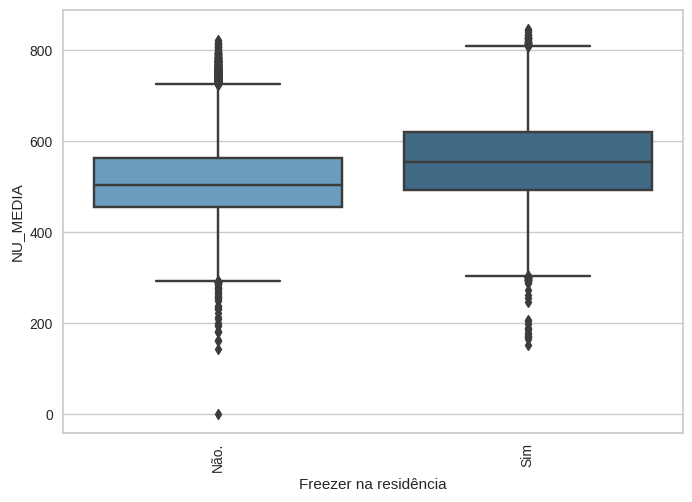

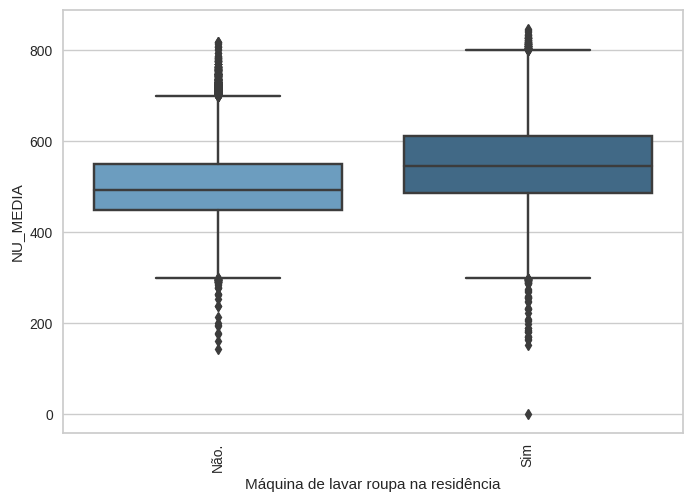

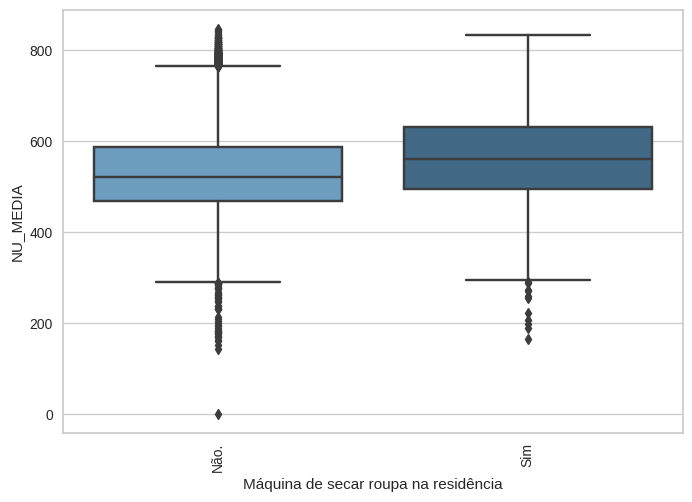

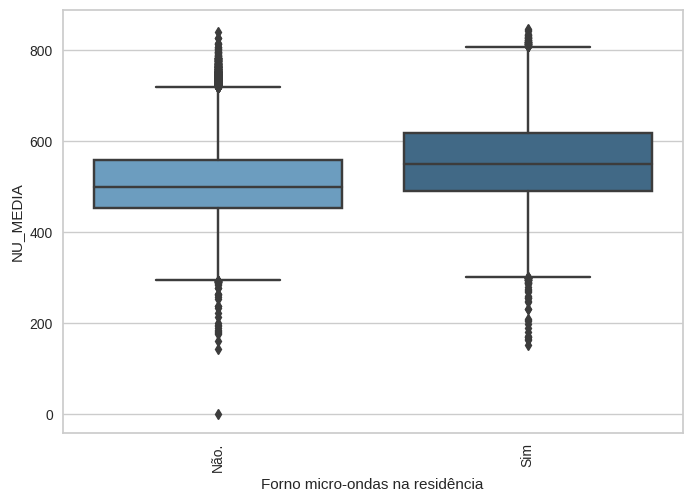

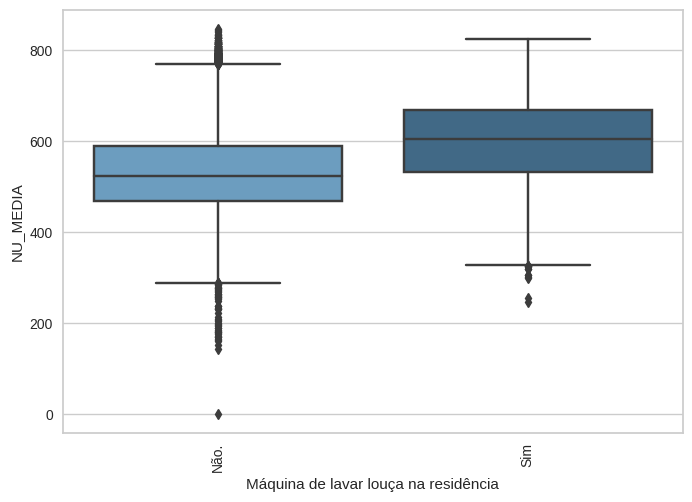

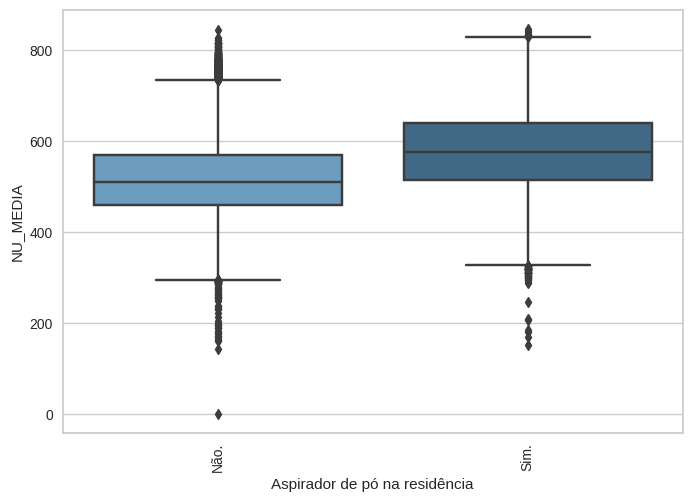

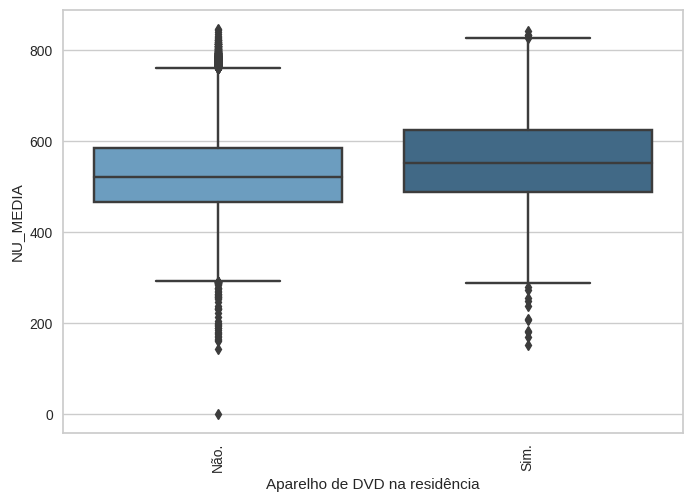

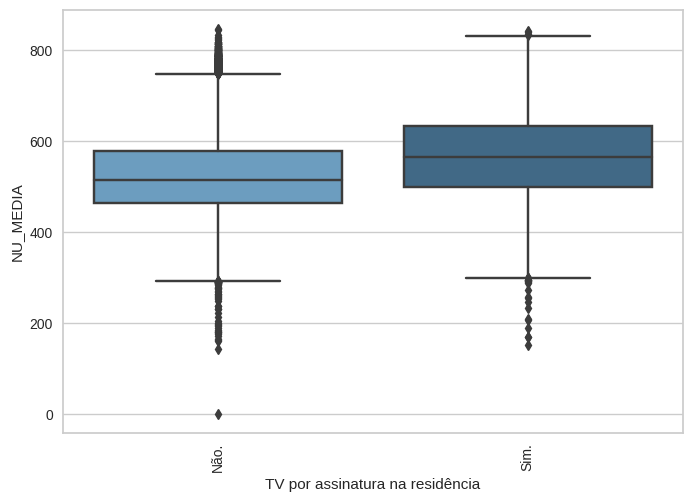

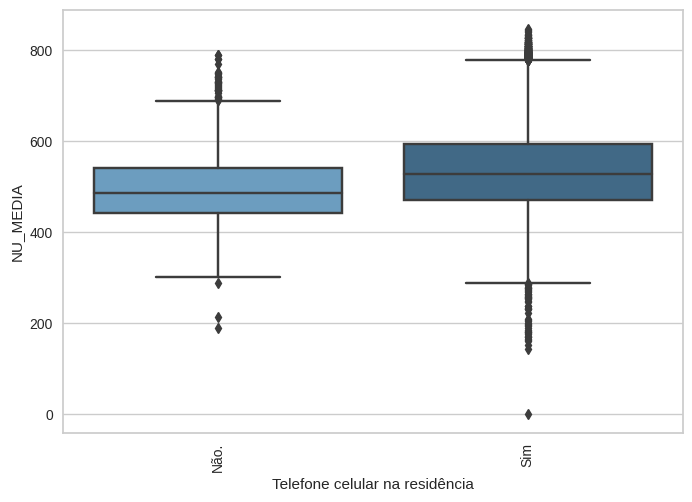

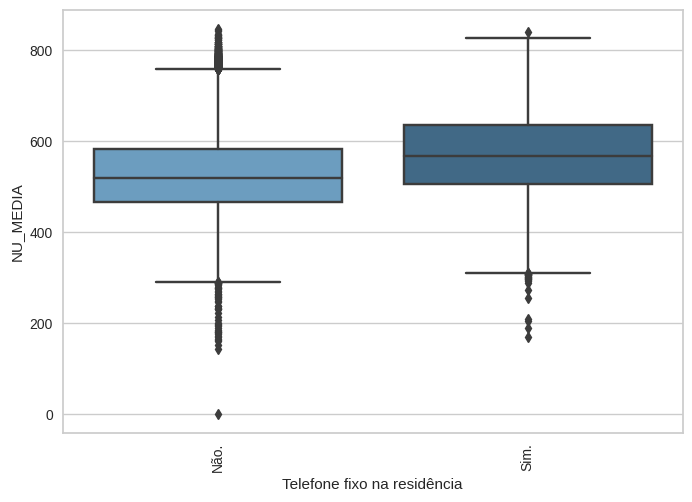

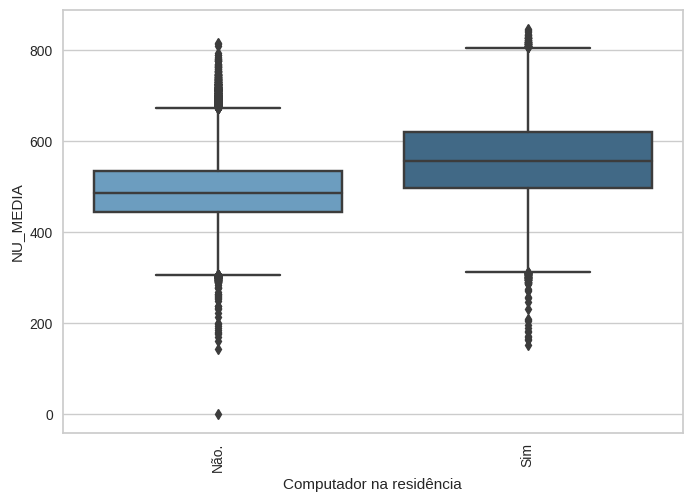

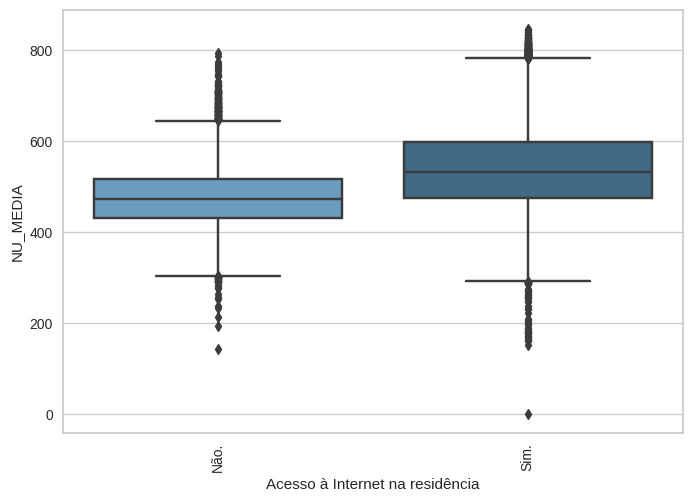

In [203]:
def bivariate_analysis(df, target_column):
    numeric_columns = df.select_dtypes(include=['int64', 'float64'])
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    for column in numeric_columns.columns:
        if column != target_column:
            sns.scatterplot(x=column, y=target_column, data=df, palette="Blues_d")
            plt.xticks(rotation=90)
            plt.show()
            print()

    for column in categorical_columns.columns:
        if column != target_column:
            sns.boxplot(x=column, y=target_column, data=df, palette="Blues_d")
            plt.xticks(rotation=90)
            plt.show()
            print()


# Exemplo de uso:
# Supondo que o dataframe se chame 'df' e a variável alvo numérica seja 'target'
bivariate_analysis(df_enem_dic, 'NU_MEDIA')

Resumindo:

As notas nas disciplinas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos e Matemática têm correlações positivas significativas com a variável alvo NU_MEDIA. Um desempenho melhor nessas disciplinas está associado a uma NU_MEDIA mais alta.

As notas nas competências de redação e a nota total de redação também têm correlações positivas com NU_MEDIA. Um desempenho melhor na redação está associado a uma NU_MEDIA mais alta.

A média de NU_MEDIA varia ligeiramente entre diferentes faixas etárias, com uma tendência de diminuição à medida que a faixa etária aumenta.

Existe uma pequena diferença na média de NU_MEDIA entre os sexos, com os participantes do sexo masculino apresentando uma média ligeiramente mais alta.

A média de NU_MEDIA varia entre as categorias de cor/raça, com os participantes brancos tendo a média mais alta, seguidos pelos amarelos, pardos, pretos, indígenas e aqueles que não declararam sua cor/raça.

A média de NU_MEDIA varia com base no estado civil, com participantes solteiros apresentando uma média ligeiramente mais alta.

A média de NU_MEDIA varia entre os tipos de escola, com participantes de escolas privadas apresentando a média mais alta, seguidos por aqueles de escolas públicas e aqueles que não responderam.

Participantes brasileiros natos ou naturalizados apresentam médias mais altas em comparação com os estrangeiros e aqueles que não informaram sua nacionalidade.

A média de NU_MEDIA é mais alta para aqueles que já concluíram o Ensino Médio em comparação com aqueles que não concluíram ou estão cursando.

As médias de NU_MEDIA variam entre diferentes cidades e estados onde as provas foram realizadas, refletindo possíveis diferenças locais.

Participantes com problemas irregulares na redação têm uma média de NU_MEDIA significativamente menor em comparação com aqueles sem problemas.

A média de NU_MEDIA varia de acordo com o nível de escolaridade dos pais e a ocupação mais próxima de seus pais e mães. A renda mensal da família e outros fatores socioeconômicos também afetam a média de NU_MEDIA.

A classe social dos participantes está associada à média de NU_MEDIA, com os de classe social A e B tendo a média mais alta e os de classe social E tendo a média mais baixa.

Sendo assim as variáveis que parecem ter maior influência na média de NU_MEDIA são:

Notas nas disciplinas de Ciências da Natureza (NU_NOTA_CN), Ciências Humanas (NU_NOTA_CH), Linguagens e Códigos (NU_NOTA_LC) e Matemática (NU_NOTA_MT): Essas notas têm correlações positivas significativas com NU_MEDIA, indicando que um desempenho melhor nessas disciplinas está associado a uma média mais alta.

Notas nas competências de redação (NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5) e nota total de redação (NU_NOTA_REDACAO): Essas notas também têm correlações positivas com NU_MEDIA, sugerindo que um desempenho melhor na redação está associado a uma média mais alta.

Nível de escolaridade do pai e da mãe (Até que série seu pai/mãe estudou): Participantes cujos pais concluíram a pós-graduação têm médias mais altas em comparação com aqueles cujos pais têm menor nível de escolaridade.

Ocupação mais próxima da ocupação do pai e da mãe: Participantes cujos pais e mães estão no Grupo 5 (ocupações de alto nível, como médicos, engenheiros, advogados) têm médias mais altas, enquanto aqueles no Grupo 1 (ocupações de baixo nível, como agricultores, pescadores) têm médias mais baixas.

Renda mensal da família: A média de NU_MEDIA aumenta conforme a renda mensal da família aumenta. Participantes com rendas mais altas têm médias mais altas.

Tipo de escola (TP_ESCOLA): Participantes de escolas privadas têm médias mais altas em comparação com aqueles de escolas públicas e aqueles que não responderam.

As variáveis nota de cada matéria e desempenho da redação serão removidas por serem variáveis preditoras do NU_MEDIA e nesta análise nos interessa os dados socioeconômicos.

## Testes de hipótese e siginificância estatística

Teste de hipóteses com NU_MEDIA de Renda mensal:

Neste caso será comparado a média das notas para as rendas. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, foi decidido entre a hipótese nula "Não existe diferença entre entre as médias das notas" e a hipótese alternativa "Existe pelo menos uma diferença na média de notas entre os grupos de diferentes rendas".

In [204]:
db_aux = df_enem_dic[['NU_MEDIA', 'Renda mensal num']]

stat, p = f_oneway(db_aux['NU_MEDIA'],db_aux['Renda mensal num']
                   )

print('stat=%.3f, p=%.3f' % (stat, p))

stat=51503.909, p=0.000


Como p < 0.05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

**Testes quiquadrados**

In [205]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
colunas_categoricas = df_enem_dic.select_dtypes(include=['object', 'category']).columns.to_list()
for a in colunas_categoricas:
  contingency_table = pd.crosstab(df_enem_dic['NU_MEDIA'], df_enem_dic[a])
  stat, p, dof, expected = chi2_contingency(contingency_table)
  print(a)
  print('Estatística Qui-quadrado: %.3f' % stat)
  print('Valor p: %.3f' % p)
  print('Graus de liberdade: %d' % dof)
  print('Tabela de Frequências Esperadas:')
  print(expected)
  print()
  print()

TP_FAIXA_ETARIA
Estatística Qui-quadrado: 361865.253
Valor p: 0.000
Graus de liberdade: 356681
Tabela de Frequências Esperadas:
[[0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 ...
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]
 [0.22906726 0.23087251 0.11616198 ... 0.01876009 0.02947367 0.10479525]]


TP_SEXO
Estatística Qui-quadrado: 28177.488
Valor p: 0.001
Graus de liberdade: 27437
Tabela de Frequências Esperadas:
[[0.61767694 0.38232306]
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]
 ...
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]
 [0.61767694 0.38232306]]


TP_COR_RACA
Estatística Qui-quadrado: 142625.955
Valor p: 0.000
Graus de liberdade: 137185
Tabela de Frequências Esperadas:
[[0.02007548 0.43758731 0.

Com base nos resultados dos testes qui-quadrado, apenas as variáveis SG_UF_PROVA, Telefone celular na residência apresentaram p < 0.05, sendo assim não temos indícios para rejeitar a hipótese nula para estas variáveis.

Desta forma as mesmas não continuarão para as próximas etapas.

In [206]:
df_enem_dic = df_enem_dic.drop(['SG_UF_PROVA', 'Telefone celular na residência'], axis = 1)

## Analisando iteração entre as variáveis

Avaliando quais variáveis tem maior correlação com NU_MEDIA

In [207]:
colunas_categoricas = df_enem_dic.select_dtypes(include=['object', 'category']).columns.to_list()
data = pd.get_dummies(df_enem_dic, columns=colunas_categoricas, drop_first=True)

correlation_matrix = data.corr()
limite_correlacao = 0.2
colunas_relevantes = correlation_matrix[abs(correlation_matrix['NU_MEDIA']) > limite_correlacao].index
colunas_relevantes.to_list()

['NU_MEDIA',
 'Renda mensal num',
 'TP_COR_RACA_Branca',
 'Até que série seu pai estudou?_Completou a Faculdade, mas não completou a Pós-graduação.',
 'Até que série seu pai estudou?_Completou a Pós-graduação.',
 'Até que série sua mãe estudou?_Completou a Pós-graduação.',
 'Ocupação mais próxima da ocupação do seu pai_Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.',
 'Ocupação mais próxima da ocupação do seu pai_Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou priva

Realizando teste VIF para verificar colinearidade entre as variáveis independentes e a NU_MEDIA

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = data.drop('NU_MEDIA', axis=1)

X = sm.add_constant(X)

# Calcular os valores de VIF
vif_data = pd.DataFrame()
vif_data["NU_MEDIA"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir os resultados
print(vif_data)

                                NU_MEDIA         VIF
0                                  const  687.832507
1                       Renda mensal num    2.735261
2                TP_FAIXA_ETARIA_18 anos    1.715448
3                TP_FAIXA_ETARIA_19 anos    1.973572
4                TP_FAIXA_ETARIA_20 anos    1.998692
..                                   ...         ...
77    Aparelho de DVD na residência_Sim.    1.125930
78  TV por assinatura na residência_Sim.    1.381514
79      Telefone fixo na residência_Sim.    1.176252
80          Computador na residência_Sim    1.586667
81  Acesso à Internet na residência_Sim.    1.249292

[82 rows x 2 columns]


In [209]:
vif_data[vif_data['VIF'] >5]

,NU_MEDIA,VIF
0,const,687.832507
16,TP_COR_RACA_Branca,12.913912
19,TP_COR_RACA_Parda,12.680300
20,TP_COR_RACA_Preta,5.818481
28,TP_ANO_CONCLUIU_2015,5.860898
29,TP_ANO_CONCLUIU_2016,7.150474
30,TP_ANO_CONCLUIU_2017,9.363666
31,TP_ANO_CONCLUIU_2018,12.656449
32,TP_ANO_CONCLUIU_2019,18.644996
33,TP_ANO_CONCLUIU_2020,29.172593


Analisando a tabela, podemos observar que algumas variáveis apresentam VIF significativamente altos, indicando multicolinearidade.A multicolinearidade ocorre quando existe uma alta correlação entre duas ou mais variáveis independentes. Isso pode ser problemático em um modelo de regressão porque torna difícil determinar a contribuição individual de cada variável para a variável alvo. Além disso, a multicolinearidade pode levar a estimativas imprecisas dos coeficientes de regressão e tornar os resultados do modelo menos confiáveis. Sendo assim, as variáveis com VIF a cima de 5 serão removidas da modelagem afim de tornar os resultados do modelo mais confiáveis.

In [210]:
df_enem_dic = df_enem_dic.drop(['TP_COR_RACA','TP_ANO_CONCLUIU','Banheiro na residência','Quartos para dormir na residência'], axis = 1)

In [211]:
df_enem_dic.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'Até que série seu pai estudou?',
       'Até que série sua mãe estudou?',
       'Ocupação mais próxima da ocupação do seu pai',
       'Ocupação mais próxima da ocupação da sua mãe',
       'Empregado(a) doméstico(a) na residência', 'Carro na residência',
       'Geladeira na residência', 'Freezer na residência',
       'Máquina de lavar roupa na residência',
       'Máquina de secar roupa na residência',
       'Forno micro-ondas na residência',
       'Máquina de lavar louça na residência', 'Aspirador de pó na residência',
       'Aparelho de DVD na residência', 'TV por assinatura na residência',
       'Telefone fixo na residência', 'Computador na residência',
       'Acesso à Internet na residência', 'NU_MEDIA', 'Renda mensal num'],
      dtype='object')

## Analise de componenetes princiapais PCA

O PCA é uma técnica de redução de dimensionalidade que transforma as variáveis originais em um conjunto menor de variáveis não correlacionadas, chamadas de componentes principais. Essa abordagem pode ajudar a reduzir a dimensionalidade do seu conjunto de dados, especialmente se houver alta correlação entre as variáveis independentes.

In [212]:
colunas_categoricas = df_enem_dic.select_dtypes(include=['object', 'category']).columns.to_list()
data = pd.get_dummies(df_enem_dic, columns=colunas_categoricas, drop_first=True)

In [213]:
data.columns

Index(['NU_MEDIA', 'Renda mensal num', 'TP_FAIXA_ETARIA_18 anos',
       'TP_FAIXA_ETARIA_19 anos', 'TP_FAIXA_ETARIA_20 anos',
       'TP_FAIXA_ETARIA_21 anos', 'TP_FAIXA_ETARIA_22 anos',
       'TP_FAIXA_ETARIA_23 anos', 'TP_FAIXA_ETARIA_24 anos',
       'TP_FAIXA_ETARIA_25 anos', 'TP_FAIXA_ETARIA_Entre 26 e 30 anos',
       'TP_FAIXA_ETARIA_Entre 31 e 35 anos',
       'TP_FAIXA_ETARIA_Entre 36 e 40 anos', 'TP_FAIXA_ETARIA_Maior de 41',
       'TP_FAIXA_ETARIA_Menor de 17 anos', 'TP_SEXO_Masculino',
       'Até que série seu pai estudou?_Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
       'Até que série seu pai estudou?_Completou a Faculdade, mas não completou a Pós-graduação.',
       'Até que série seu pai estudou?_Completou a Pós-graduação.',
       'Até que série seu pai estudou?_Completou o Ensino Médio, mas não completou a Faculdade.',
       'Até que série seu pai estudou?_Nunca estudou.',
       'Até que série seu pai estudou?_Não comp

In [214]:
from sklearn.decomposition import PCA

# Separar as variáveis independentes danificadas e a variável alvo
X = data.drop('NU_MEDIA', axis=1)
y = data['NU_MEDIA']

# Aplicar o PCA
pca = PCA(n_components=2)  # Definir o número de componentes principais desejados
X_pca = pca.fit_transform(X)

# Verificar a variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print('Variância explicada por cada componente:', explained_variance_ratio)

# Acessar os componentes principais
components = pca.components_
print('Componentes principais:', components)

# Criar um novo DataFrame com os componentes principais e a variável alvo
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['NU_MEDIA'] = y

# Exibir o novo DataFrame
print(df_pca.head())

# Exibir os pesos das variáveis em cada componente principal
component_names = ['Componente 1', 'Componente 2']
for i, component in enumerate(components):
    print(f'\nPesos do {component_names[i]}:')
    for j, variable in enumerate(X.columns):
        weight = component[j]
        print(f'{variable}: {weight}')


Variância explicada por cada componente: [9.99999725e-01 3.15160967e-08]
Componentes principais: [[ 9.99999989e-01 -7.56290310e-07 -3.30692970e-06 -2.72989108e-06
  -2.22502831e-06 -1.72076691e-06 -1.27122269e-06 -1.26566694e-06
  -9.94462831e-07 -3.04392976e-06 -1.43548136e-06 -8.83476889e-07
  -1.11432369e-06  1.19400893e-05  8.47746681e-06 -6.23800852e-06
   1.77281435e-05  2.75689972e-05 -4.79077884e-06 -3.95868175e-06
  -1.52954302e-05 -5.87940784e-06 -8.28090220e-06  1.56037924e-05
   2.96749667e-05 -1.29644903e-05 -2.50729205e-06 -1.12109114e-05
  -1.41387494e-06 -1.49559397e-05 -1.33095626e-05  1.71791970e-05
   3.43222694e-05 -6.28978445e-06 -2.77484022e-05 -3.20462914e-06
   2.11633145e-05  2.54962611e-05 -1.03096814e-06  3.40560841e-05
   4.72842701e-05  1.33404591e-06  3.54697707e-05  3.57868455e-05
   2.15562795e-05  3.88739649e-05  1.52579858e-05  4.69475040e-05
   2.33534478e-05  4.26450042e-05  2.42445285e-05  3.87073147e-05
   1.07242448e-05]
 [ 1.18481274e-04 -3.26836

Com base no resultado obtidos, podemos observar que o primeiro componente principal possui pesos praticamente iguais para todas as variáveis, com valores próximos a zero. Isso indica que o primeiro componente não está fortemente relacionado com nenhuma variável específica.

Já o segundo componente principal apresenta pesos diferentes para várias variáveis. Algumas variáveis que parecem ter uma influência maior no segundo componente principal.

Essa análise dos pesos dos componentes principais nos ajuda a entender a contribuição relativa de cada variável na formação dos componentes principais e pode ser útil para identificar as variáveis mais relevantes para a variação dos dados.

Desta forma assumirei que todas as colunas restantes tem alguma influencia na variável alvo.

#Modelagem

Prosseguirei utilizarei o pycaret

In [145]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef


In [146]:
!pip install pycaret > /dev/null

In [215]:
from pycaret.regression import setup, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

regressao = setup(data=df_enem_dic,
                  target='NU_MEDIA',
                  normalize=True)

,Description,Value
0,Session id,5078
1,Target,NU_MEDIA
2,Target type,Regression
3,Original data shape,"(110234, 22)"
4,Transformed data shape,"(110234, 59)"
5,Transformed train set shape,"(77163, 59)"
6,Transformed test set shape,"(33071, 59)"
7,Ordinal features,15
8,Numeric features,1
9,Categorical features,20


In [216]:
melhores_modelos = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,58.3397,5474.4391,73.9870,0.3049,0.1431,0.1133,1.8040
gbr,Gradient Boosting Regressor,58.7246,5530.1378,74.3620,0.2979,0.1438,0.1140,8.8580
xgboost,Extreme Gradient Boosting,58.8360,5574.7222,74.6616,0.2922,0.1443,0.1142,14.1340
br,Bayesian Ridge,59.2916,5622.6154,74.9813,0.2862,0.1449,0.1151,1.1170
ridge,Ridge Regression,59.2894,5622.6480,74.9815,0.2861,0.1449,0.1151,0.8640
lar,Least Angle Regression,59.2894,5622.6481,74.9815,0.2861,0.1449,0.1151,0.9610
lr,Linear Regression,59.2990,5624.0701,74.9910,0.2860,0.1449,0.1151,2.9670
huber,Huber Regressor,59.2150,5629.4656,75.0271,0.2853,0.1447,0.1146,1.3980
llar,Lasso Least Angle Regression,59.4946,5655.2096,75.1981,0.2820,0.1452,0.1155,0.7510
lasso,Lasso Regression,59.4946,5655.2063,75.1980,0.2820,0.1452,0.1155,2.1950


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Experimentando outras abordagens**

In [236]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

colunas_categoricas = df_enem_dic.select_dtypes(include=['object', 'category']).columns.to_list()
data = pd.get_dummies(df_enem_dic, columns=colunas_categoricas, drop_first=True)

X = data.drop("NU_MEDIA", axis=1)
y = data["NU_MEDIA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos com diferentes parâmetros
model_versions = [
    LinearRegression(),
    LinearRegression(fit_intercept=False),
    LinearRegression(copy_X=False),
    LinearRegression(n_jobs=-1),
    RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=50, max_depth=3, random_state=42),
    RandomForestRegressor(n_estimators=150, max_depth=7, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42),
    KNeighborsRegressor(n_neighbors=5),
    KNeighborsRegressor(n_neighbors=10),
    KNeighborsRegressor(n_neighbors=3),
    KNeighborsRegressor(n_neighbors=7),
    KNeighborsRegressor(n_neighbors=5, weights='distance')
]

# Executando os modelos e avaliando o desempenho
for model in model_versions:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Modelo: {model.__class__.__name__}")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print("----------------------------------------")


Modelo: LinearRegression
MAE: 59.115
MSE: 5573.105
RMSE: 74.653
R²: 0.288
----------------------------------------
Modelo: LinearRegression
MAE: 64.294
MSE: 7275.814
RMSE: 85.298
R²: 0.071
----------------------------------------
Modelo: LinearRegression
MAE: 59.115
MSE: 5573.105
RMSE: 74.653
R²: 0.288
----------------------------------------
Modelo: LinearRegression
MAE: 59.115
MSE: 5573.105
RMSE: 74.653
R²: 0.288
----------------------------------------
Modelo: RandomForestRegressor
MAE: 60.277
MSE: 5794.645
RMSE: 76.123
R²: 0.260
----------------------------------------
Modelo: RandomForestRegressor
MAE: 59.275
MSE: 5617.611
RMSE: 74.951
R²: 0.282
----------------------------------------
Modelo: RandomForestRegressor
MAE: 61.179
MSE: 5958.593
RMSE: 77.192
R²: 0.239
----------------------------------------
Modelo: RandomForestRegressor
MAE: 59.752
MSE: 5699.808
RMSE: 75.497
R²: 0.272
----------------------------------------
Modelo: RandomForestRegressor
MAE: 60.277
MSE: 5794.645
RMSE

In [217]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,57.8534,5362.3821,73.2283,0.2939,0.1400,0.1125
1,58.1810,5455.2340,73.8596,0.3075,0.1577,0.1132
2,58.6223,5500.1697,74.1631,0.3076,0.1417,0.1140
3,57.9527,5384.4794,73.3790,0.2967,0.1402,0.1123
4,58.1412,5430.7290,73.6935,0.3003,0.1401,0.1124
5,58.3448,5496.2844,74.1369,0.2987,0.1413,0.1131
6,59.3061,5676.3259,75.3414,0.3111,0.1444,0.1154
7,57.7019,5383.0393,73.3692,0.3189,0.1407,0.1120
8,58.4928,5508.6653,74.2204,0.3105,0.1425,0.1138


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [222]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [225]:
pred = predict_model(lightgbm, data=df_enem_dic)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,57.6122,5328.0313,72.9934,0.3244,0.1408,0.1118


,TP_FAIXA_ETARIA,TP_SEXO,Até que série seu pai estudou?,Até que série sua mãe estudou?,Ocupação mais próxima da ocupação do seu pai,Ocupação mais próxima da ocupação da sua mãe,Empregado(a) doméstico(a) na residência,Carro na residência,Geladeira na residência,Freezer na residência,...,Máquina de lavar louça na residência,Aspirador de pó na residência,Aparelho de DVD na residência,TV por assinatura na residência,Telefone fixo na residência,Computador na residência,Acesso à Internet na residência,Renda mensal num,NU_MEDIA,prediction_label
1,20 anos,Feminino,"Completou a Faculdade, mas não completou a Pós-graduação.","Completou a Faculdade, mas não completou a Pós-graduação.","Grupo 4: Professor (de ensino fundamental ou médio, idio...","Grupo 4: Professora (de ensino fundamental ou médio, idi...",Não.,Não.,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Sim,Sim.,1100.000000,546.559998,563.800845
2,Maior de 41,Feminino,"Completou o Ensino Médio, mas não completou a Faculdade.","Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 1: Lavrador, agricultor sem empregados, bóia fria,...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Sim,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Não.,Não.,1100.000000,431.380005,462.146052
3,18 anos,Feminino,Não completou a 4ª série/5º ano do Ensino Fundamental.,"Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Não.,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Não.,Sim.,1375.005005,565.799988,489.372929
4,17 anos,Feminino,"Completou o Ensino Médio, mas não completou a Faculdade.","Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 4: Professor (de ensino fundamental ou médio, idio...","Grupo 4: Professora (de ensino fundamental ou médio, idi...",Não.,Sim,Sim,Sim,...,Não.,Não.,Não.,Não.,Não.,Sim,Sim.,2475.004883,576.119995,557.422481
5,18 anos,Feminino,Não completou a 4ª série/5º ano do Ensino Fundamental.,"Completou o Ensino Médio, mas não completou a Faculdade.","Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Não.,Sim,Sim,...,Não.,Não.,Não.,Não.,Não.,Não.,Sim.,1100.000000,408.239990,494.156815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168963,Entre 26 e 30 anos,Masculino,Não completou a 4ª série/5º ano do Ensino Fundamental.,Não completou a 4ª série/5º ano do Ensino Fundamental.,"Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Não.,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Não.,Sim.,1375.005005,450.260010,498.342628
168964,Entre 26 e 30 anos,Feminino,Não completou a 4ª série/5º ano do Ensino Fundamental.,"Completou a 4ª série/5º ano, mas não completou a 8ª séri...","Grupo 4: Professor (de ensino fundamental ou médio, idio...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Sim,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Sim,Sim.,1100.000000,529.840027,528.750257
168971,17 anos,Feminino,"Completou a 4ª série/5º ano, mas não completou a 8ª séri...",Não completou a 4ª série/5º ano do Ensino Fundamental.,"Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 4: Professora (de ensino fundamental ou médio, idi...",Não.,Não.,Sim,Não.,...,Não.,Não.,Sim.,Não.,Não.,Não.,Sim.,1375.005005,444.459991,504.151901
168972,23 anos,Feminino,"Completou a 4ª série/5º ano, mas não completou a 8ª séri...","Completou a Faculdade, mas não completou a Pós-graduação.","Grupo 3: Padeiro, cozinheiro industrial ou em restaurant...","Grupo 2: Diarista, empregada doméstica, cuidadora de ido...",Não.,Não.,Sim,Não.,...,Não.,Não.,Não.,Não.,Não.,Sim,Sim.,1375.005005,418.079987,547.532430


Com base nos resultados:

O modelo obteve um valor de MAE (Mean Absolute Error) de 57.6122, o que significa que, em média, as previsões do modelo estão a uma distância de aproximadamente 57.6122 unidades da variável de destino real. Quanto menor o valor do MAE, melhor o desempenho do modelo. Esse resultado indica que o modelo tem uma capacidade razoável de fazer previsões precisas.

Além disso, o valor do RMSE (Root Mean Squared Error) de 72.9934 indica que as previsões do modelo têm uma dispersão média de aproximadamente 72.9934 unidades em relação aos valores reais. Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados. Esse valor indica que o modelo tem uma boa capacidade de generalização e pode fornecer previsões confiáveis.

O valor do R2 de 0.3244 indica que cerca de 32.44% da variabilidade dos dados é explicada pelo modelo. Quanto mais próximo de 1, melhor o ajuste do modelo aos dados. Embora esse valor ainda possa ser melhorado, indica que o modelo é capaz de capturar uma parte significativa da variação nos dados de destino.

Além das métricas mencionadas, o modelo também obteve um baixo valor de RMSLE (Root Mean Squared Logarithmic Error) de 0.1408, que é uma medida adequada quando a distribuição dos dados é assimétrica. O valor do MAPE (Mean Absolute Percentage Error) de 0.1118 indica uma boa precisão relativa do modelo.

Com base nessas métricas, podemos concluir que o modelo LightGBM alcançou resultados promissores em termos de precisão e ajuste aos dados. No entanto, é importante considerar o contexto específico do problema e os requisitos do projeto ao avaliar a adequação do modelo final.

In [227]:
modelo_final = finalize_model(lightgbm)

In [228]:
save_model(modelo_final, 'previsao_enem')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Renda mensal num'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     in...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_

**Testando modelo**

In [246]:
import pandas as pd

modelo = load_model('previsao_enem')

def PrevisaoNU_MEDIA(idade, sexo, serie_pai, serie_mae, ocupacao_pai, ocupacao_mae, emp_domestico, carro_residencia,
                     geladeira, freezer, maq_lavar_roupa, maq_secar_roupa, micro_ondas, maq_lavar_louca, aspirador_po,
                     aparelho_dvd, tv_assinatura, telefone_fixo, computador, internet, renda):
    dados = pd.DataFrame({
        'TP_FAIXA_ETARIA': [idade],
        'TP_SEXO': [sexo],
        'Até que série seu pai estudou?': [serie_pai],
        'Até que série sua mãe estudou?': [serie_mae],
        'Ocupação mais próxima da ocupação do seu pai': [ocupacao_pai],
        'Ocupação mais próxima da ocupação da sua mãe': [ocupacao_mae],
        'Empregado(a) doméstico(a) na residência': [emp_domestico],
        'Carro na residência': [carro_residencia],
        'Geladeira na residência': [geladeira],
        'Freezer na residência': [freezer],
        'Máquina de lavar roupa na residência': [maq_lavar_roupa],
        'Máquina de secar roupa na residência': [maq_secar_roupa],
        'Forno micro-ondas na residência': [micro_ondas],
        'Máquina de lavar louça na residência': [maq_lavar_louca],
        'Aspirador de pó na residência': [aspirador_po],
        'Aparelho de DVD na residência': [aparelho_dvd],
        'TV por assinatura na residência': [tv_assinatura],
        'Telefone fixo na residência': [telefone_fixo],
        'Computador na residência': [computador],
        'Acesso à Internet na residência': [internet],
        'Renda mensal num': [renda]
    })

    pred = modelo.predict(dados)
    return pred[0]


Transformation Pipeline and Model Successfully Loaded


In [248]:
idade = 20
sexo = 'Feminino'
serie_pai = 'Completou o Ensino Médio, mas não completou a Faculdade.'
serie_mae = 'Completou a Faculdade, mas não completou a Pós-graduação.'
ocupacao_pai = 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.'
ocupacao_mae = 'Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.'
emp_domestico = 'Não.'
carro_residencia = 'Sim.'
geladeira = 'Sim.'
freezer = 'Sim.'
maq_lavar_roupa = 'Sim.'
maq_secar_roupa = 'Não.'
micro_ondas = 'Sim.'
maq_lavar_louca = 'Não.'
aspirador_po = 'Não.'
aparelho_dvd = 'Sim.'
tv_assinatura = 'Não.'
telefone_fixo = 'Sim.'
computador = 'Sim.'
internet = 'Sim.'
renda = 1500

resultado = PrevisaoNU_MEDIA(idade, sexo, serie_pai, serie_mae, ocupacao_pai, ocupacao_mae, emp_domestico, carro_residencia,
                     geladeira, freezer, maq_lavar_roupa, maq_secar_roupa, micro_ondas, maq_lavar_louca, aspirador_po,
                     aparelho_dvd, tv_assinatura, telefone_fixo, computador, internet, renda)

print("Resultado da previsão para NU_MEDIA:", resultado)


Resultado da previsão para NU_MEDIA: 518.2611993932039


# Conclusão

Resumo da minha conclusão do estudo:

Meu objetivo neste projeto foi explorar alternativas de regressão linear e criar o melhor modelo possível para prever o desempenho de alunos com base em dados socioeconômicos do ENEM (Exame Nacional do Ensino Médio) 2021.

Para isso, utilizei um conjunto de dados estratificado por estado, representando 10% do total de candidatos inscritos no ENEM. Os dados completos podem ser obtidos no Portal de Dados Abertos do INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira). O conjunto de dados é baseado em duas fontes de informação: o questionário socioeconômico, respondido pelos candidatos durante o processo de inscrição em 2021, e as notas obtidas pelos candidatos em cinco áreas do exame: redação, matemática, linguagens e códigos, ciências humanas e ciências da natureza.

A variável-alvo (ou target) deste projeto é a variável NU_MEDIA, que representa a média aritmética das cinco notas obtidas pelos candidatos no ENEM. Meu objetivo foi desenvolver um modelo de regressão capaz de prever essa média com base nas informações socioeconômicas dos alunos.

Durante a análise univariada, pude observar informações importantes sobre as características dos participantes, como faixa etária, sexo, cor/raça, nível de escolaridade dos pais, ocupações dos pais, renda mensal da família e características da residência.

Ao analisar as correlações na análise bivariada, identifiquei que as notas nas disciplinas do ENEM, desempenho na redação e características socioeconômicas dos alunos têm influência na média de desempenho. Variáveis como nível de escolaridade dos pais, ocupações dos pais, renda familiar e tipo de escola mostraram associações significativas com a média de desempenho.

Realizei uma análise de multicolinearidade usando o fator de inflação de variância (VIF) e identifiquei variáveis com alto VIF, o que indica multicolinearidade. Decidi remover essas variáveis da modelagem para garantir resultados mais confiáveis.

Também utilizei a análise de componentes principais (PCA) para entender a contribuição relativa de cada variável na variação dos dados. Isso me ajudou a identificar as variáveis mais relevantes para a predição da média de desempenho dos alunos.

Por fim, desenvolvi um modelo de regressão linear utilizando o algoritmo LightGBM. Meu modelo apresentou métricas de desempenho razoáveis, como MAE, RMSE, R2, RMSLE e MAPE. Essas métricas indicam que meu modelo tem uma capacidade razoável de fazer previsões precisas e generalizar para novos dados.

É importante ressaltar que este estudo possui suas limitações. Os resultados são baseados em dados do ENEM de 2021 e podem não ser generalizáveis para outras populações ou anos do exame. Além disso, existem outras técnicas de modelagem e algoritmos que poderiam ser explorados para melhorar o desempenho do modelo.

Em suma, este estudo proporcionou uma compreensão abrangente dos dados socioeconômicos do ENEM e a criação de um modelo de regressão linear para prever a média de desempenho dos alunos. Os resultados obtidos podem ser úteis para identificar fatores socioeconômicos que influenciam o desempenho dos alunos e fornecer insights para a melhoria da educação.